In [365]:
import pandas as pd
import numpy as np
import multiprocessing

multiprocessing.cpu_count()
import torch
import os
import pandas as pd
from torchvision.io import read_image
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from torch import nn, optim
import torch.nn.functional as F
import torch.utils.data as data
import torch
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from collections import Counter
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from collections import OrderedDict
from copy import deepcopy
import copy
import random






In [369]:
torch.manual_seed(2)
torch.cuda.manual_seed_all(2)
torch.backends.cudnn.deterministic = True
np.random.seed(1)
random.seed(1)
device = torch.device('cpu')
torch.backends.cudnn.benchmark = False

In [560]:
Train_data

,Inferred_Gender,Age,X1.8495945_T_C_C,X1.20149058_A_G_G,X1.20149560_G_A_A,X1.20150839_A_G_G,X1.20150984_C_G_G,X1.20150998_A_G_G,X1.20151290_C_A_A,X1.20151431_A_G_G,...,WWP2,XCL1,XG,XPNPEP2,XRCC4,YES1,YTHDF3,ZBTB16,ZBTB17,Y
0,0,0.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.1779,0.0035,-0.00010,1.53040,0.14805,0.1138,0.00205,-0.15445,-0.23840,0.0
1,0,0.766667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.4763,1.6084,2.50490,0.20960,0.95065,1.7539,1.60820,2.95895,2.38200,0.0
2,0,0.466667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4304,-0.5720,-0.11230,-0.79590,0.14650,0.0000,-1.20050,1.00125,0.40830,0.0
3,1,0.633333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0434,-0.4618,-0.16240,0.57460,0.15085,-0.2558,-0.20285,-0.18495,-0.15640,0.0
4,1,0.033333,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,-0.7404,-0.4804,-0.39375,1.16155,0.29955,-2.4493,-1.99725,-0.15660,0.01445,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26068,0,0.066667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.4456,-0.8182,0.16810,-0.06440,0.57295,1.7542,0.23905,0.67695,0.45420,0.0
26069,0,0.433333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.3378,-0.1453,0.22240,1.03260,0.07465,0.8922,0.16935,0.42315,0.18060,0.0
26070,1,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5050,-0.2181,0.01400,-1.21590,0.06865,1.2475,0.77360,0.56455,-0.40670,0.0
26071,1,0.466667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4288,-0.0295,-0.56130,-2.15160,0.17025,0.7288,0.44765,0.04625,-0.12660,0.0


In [564]:
Train_data.groupby('Inferred_Gender').Y.apply(lambda x: pd.Series([(x == 0).sum(), (x == 1).sum()])).unstack()

,0,1
Inferred_Gender,,
0,13957,176
1,11650,290


In [565]:
176/(13957+176)

0.012453123894431473

In [566]:
290/(290+11650)

0.024288107202680067

In [140]:
# Trn_input =  pd.read_csv("TrainTest/ukbiobank_variantsonlytraindata_eid.csv")
# Trn_target = pd.read_csv("TrainTest/ukbiobank_variantsonlytrainy_eid.csv")
# Test_input = pd.read_csv("TrainTest/ukbiobank_variantsonlytestdata_eid.csv")
# Test_target = pd.read_csv("TrainTest/ukbiobank_variantsonlytesty_eid.csv")
# Val_input = pd.read_csv("TrainTest/ppmi_variantsonlyvaldata_eid.csv")
# Val_target = pd.read_csv("TrainTest/ppmi_variantsonlyvaly_eid.csv")

In [141]:
# Trn_input = pd.concat([Trn_input, pd.DataFrame(Trn_target)], axis=1)
# Test_input = pd.concat([Test_input, pd.DataFrame(Test_target)], axis=1)

In [142]:
# Trn_input.drop(["Unnamed: 0"], axis=1, inplace=True) 
# Trn_target.drop(["Unnamed: 0"], axis=1, inplace=True) 
# Test_input.drop(["Unnamed: 0"], axis=1, inplace=True)
# Test_target.drop(["Unnamed: 0"], axis=1, inplace=True) 
# Val_input.drop(["Unnamed: 0"], axis=1, inplace=True)
# Val_target.drop(["Unnamed: 0"], axis=1, inplace=True) 

In [143]:
# Trn_input.iloc[600:20,10:20]

In [144]:
# Trn_input.shape

In [145]:
#
#ukblood_values = ukblood_values.rename({'eid':'eid_correct'}, axis=1)

In [146]:
# ukolink1.index.names = ['eid_correct']

In [147]:
# ukblood_values = ukolink1

In [148]:
# ukolink1

In [149]:
# Test_input.iloc[1:100,680:690]

In [150]:
# Trn_input = Trn_input.merge(ukblood_values,how='inner', on="eid_correct")
# Test_input = Test_input.merge(ukblood_values,how='inner', on="eid_correct")

In [151]:
# Trn_input["Y"].sum()

In [152]:
# Trn_target = Trn_input["Y"]
# Test_target = Test_input["Y"]

In [153]:
# Trn_input.drop(["Y"], axis=1, inplace=True)
# Test_input.drop(["Y"], axis=1, inplace=True)

In [154]:
# Trn_input.drop(["eid_correct"], axis=1, inplace=True)
# Test_input.drop(["eid_correct"], axis=1, inplace=True)

In [155]:
# Trn_input.fillna(Trn_input.mode().iloc[0], inplace=True)
# Test_input.fillna(Test_input.mode().iloc[0], inplace=True)

In [156]:
#Trn_input.to_pickle("TRAIN_FINAL_VARIANTS_OLINK")
#Test_input.to_pickle("TEST_FINAL_VARIANTS_OLINK")
#Trn_target.to_pickle("TRAIN_Y_FINAL_VARIANTS_OLINK")
#Test_target.to_pickle("TEST_Y_FINAL_VARIANTS_OLINK")

In [157]:
# Trn_input

In [619]:
#LOAD DATA


In [159]:
Trn_input = pd.read_pickle("/home/ffc4001/ukbiobankdata/Data/final_X_trainolink")
Test_input = pd.read_pickle("/home/ffc4001/ukbiobankdata/Data/final_X_testolink")
Trn_target = pd.read_pickle("/home/ffc4001/ukbiobankdata/Data/final_Y_trainolink")
Test_target = pd.read_pickle("/home/ffc4001/ukbiobankdata/Data/final_Y_testolink")
x_val =pd.read_pickle("/home/ffc4001/ukbiobankdata/Data/final_updated_X_valolink")
Y_val =pd.read_pickle("/home/ffc4001/ukbiobankdata/Data/final_updated_Y_valolink")

In [641]:
Trn_input

,Inferred_Gender,Age,X1.8495945_T_C_C,X1.20149058_A_G_G,X1.20149560_G_A_A,X1.20150839_A_G_G,X1.20150984_C_G_G,X1.20150998_A_G_G,X1.20151290_C_A_A,X1.20151431_A_G_G,...,WNT9A,WWP2,XCL1,XG,XPNPEP2,XRCC4,YES1,YTHDF3,ZBTB16,ZBTB17
0,0,0.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.3976,-0.1779,0.0035,-0.00010,1.53040,0.14805,0.1138,0.00205,-0.15445,-0.23840
1,0,0.766667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.5776,1.4763,1.6084,2.50490,0.20960,0.95065,1.7539,1.60820,2.95895,2.38200
2,0,0.466667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.1263,0.4304,-0.5720,-0.11230,-0.79590,0.14650,0.0000,-1.20050,1.00125,0.40830
3,1,0.633333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0088,0.0434,-0.4618,-0.16240,0.57460,0.15085,-0.2558,-0.20285,-0.18495,-0.15640
4,1,0.033333,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,-0.4184,-0.7404,-0.4804,-0.39375,1.16155,0.29955,-2.4493,-1.99725,-0.15660,0.01445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26068,0,0.066667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.6161,1.4456,-0.8182,0.16810,-0.06440,0.57295,1.7542,0.23905,0.67695,0.45420
26069,0,0.433333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.3589,0.3378,-0.1453,0.22240,1.03260,0.07465,0.8922,0.16935,0.42315,0.18060
26070,1,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2424,0.5050,-0.2181,0.01400,-1.21590,0.06865,1.2475,0.77360,0.56455,-0.40670
26071,1,0.466667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0208,0.4288,-0.0295,-0.56130,-2.15160,0.17025,0.7288,0.44765,0.04625,-0.12660


In [665]:
Trn_input.iloc[0:1,542]

0    0.0
Name: X22.39758881_A_G_A, dtype: float64

In [679]:
cat_col_index = list(range(2,543))


In [680]:
cat_col_index.insert(0,0)

In [681]:
cat_col_index

[0,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [684]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 257 kB 4.1 MB/s eta 0:00:01
  distutils: /home/ffc4001/.local/lib/python3.9/site-packages
  sysconfig: /home/ffc4001/.local/lib64/python3.9/site-packages
  user = True
  home = None
  root = None
  prefix = None


In [711]:
#Smote analysis
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=cat_col_index, random_state=42,sampling_strategy=.03)
X_resampled, y_resampled = smote_nc.fit_resample(Trn_input, Trn_target)





In [714]:
Trn_target.sum()

466.0

In [713]:
print(sorted(Counter(y_resampled).items()))
#print(X_resampled[-5:])


[(0.0, 25607), (1.0, 768)]


In [715]:
Train_data = pd.concat([X_resampled, pd.DataFrame(y_resampled)], axis=1)
Test_data = pd.concat([Test_input, pd.DataFrame(Test_target)], axis=1)

In [716]:
#Large Batch Size due to few cases, don't want batches with no cases
BATCH_SIZE_1 = 100000
BATCH_SIZE_2 = 100000

In [694]:
Train_data

,Inferred_Gender,Age,X1.8495945_T_C_C,X1.20149058_A_G_G,X1.20149560_G_A_A,X1.20150839_A_G_G,X1.20150984_C_G_G,X1.20150998_A_G_G,X1.20151290_C_A_A,X1.20151431_A_G_G,...,WWP2,XCL1,XG,XPNPEP2,XRCC4,YES1,YTHDF3,ZBTB16,ZBTB17,Y
0,0,0.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.177900,0.003500,-0.000100,1.530400,0.148050,0.113800,0.002050,-0.154450,-0.238400,0.0
1,0,0.766667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.476300,1.608400,2.504900,0.209600,0.950650,1.753900,1.608200,2.958950,2.382000,0.0
2,0,0.466667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.430400,-0.572000,-0.112300,-0.795900,0.146500,0.000000,-1.200500,1.001250,0.408300,0.0
3,1,0.633333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.043400,-0.461800,-0.162400,0.574600,0.150850,-0.255800,-0.202850,-0.184950,-0.156400,0.0
4,1,0.033333,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,-0.740400,-0.480400,-0.393750,1.161550,0.299550,-2.449300,-1.997250,-0.156600,0.014450,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51209,0,0.736398,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.008718,-0.473455,0.169553,-0.721963,-0.495762,-0.479355,-1.285015,0.147313,-0.597511,1.0
51210,1,0.878745,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.688286,0.398131,-0.331439,-1.869014,-0.112855,-1.394101,-0.836630,-0.738209,-0.156326,1.0
51211,1,0.894055,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.007974,-0.243435,0.017717,0.407418,0.220423,0.555569,1.253265,1.397995,-0.055497,1.0
51212,0,0.875782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.281560,0.163509,-0.368302,0.005062,-0.000750,-0.361055,-0.060362,-0.145923,-0.160435,1.0


In [717]:
class VariantsDataset(Dataset):
    """Variants."""

    
    def __init__(self, data):
        self.data = torch.FloatTensor(data.values.astype('float'))
        print(self.data.shape)
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        target = self.data[index][-1]
        data_val = self.data[index] [:-1]
        return data_val,target

In [718]:
# training and Test dataset 
train_dataset = VariantsDataset(Train_data)
test_dataset = VariantsDataset(Test_data)
val_dataset = VariantsDataset(val_data)


torch.Size([26375, 2004])
torch.Size([17335, 2004])
torch.Size([103, 2004])


In [719]:
kwargs = {'num_workers': 45, 'pin_memory': True} 

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE_1, shuffle=True, **kwargs)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE_2, shuffle=True, **kwargs)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE_2, shuffle=True, **kwargs)

In [720]:
#val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE_2, shuffle=True, **kwargs)

In [721]:
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7f9086800f40>,
 <torch.utils.data.dataloader.DataLoader at 0x7f9085e998e0>)

In [722]:
# Neural network 
device ="cpu"
input_size = 2003
hidden_size = 120 #120
num_classes = 1
num_epochs = 40
learning_rate = 0.001
hidden_size2 = 40 #40 self,2003, 120, 40, 1

In [723]:
#  ---------------  Model  ---------------
class LinearModel(nn.Module):
    def __init__(self, input_size, hidden_size, hidden_size2, num_classes):
        super(LinearModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)
        self.lrelu1 = nn.LeakyReLU()
        self.lrelu2 = nn.LeakyReLU()
        self.dropout1 = nn.Dropout(0.20)
        self.dropout2 = nn.Dropout(0.20)

    def get_weights(self):
        return self.weight
    
    def forward(self,x):
        out = self.fc1(x)
        out = self.lrelu1(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        out = self.lrelu2(out)
        out = self.dropout2(out)
        out = self.fc3(out)
        return out

In [724]:
# #  ---------------  Model Fix For SHAP ---------------
# class LinearModel(nn.Module):
#     def __init__(self, input_size, hidden_size, hidden_size2, num_classes):
#         super(LinearModel, self).__init__()
#         self.fclayers = nn.sequential(
#         nn.Linear(input_size, hidden_size),
#         self.lrelu = nn.LeakyReLU(),
#         self.dropout = nn.Dropout(0.25)),
#         nn.Linear(hidden_size, hidden_size2),
#         self.lrelu = nn.LeakyReLU(),
#         self.dropout = nn.Dropout(0.25)),
#         nn.Linear(hidden_size2, num_classes))
        
#     def get_weights(self):
#         return self.weight
    
#     def forward(self,x):
#         out = self.fc1(x)
#         out = self.lrelu(out)
#         out = self.dropout(out)
#         out = self.fc2(out)
#         out = self.lrelu(out)
#         out = self.dropout(out)
#         out = self.fc3(out)
#         return out

In [725]:
def train(model,device,train_loader,optimizer):
    model.train()
    correct = 0
    loss_total = 0
    y_true = []
    y_pred = []
    for i in train_loader:
        
        #LOADING THE DATA IN A BATCH
        data, target = i
        #print(target)
        #print(data)
        # moving the tensors to the configured device
        data, target = data.to(device), target.to(device)
       
        #FORWARD PASS
        target = target.float()
        output = model(data.float())
        #print(output)
        #print(target)
        loss = criterion(output, target.unsqueeze(1)) 
        
        loss_total += loss
        
        #BACKWARD AND OPTIMIZE
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        
        #PREDICTIONS BCELogitsloss()
        pred = np.round(torch.sigmoid(output.detach()))
        target = target.float()
        y_true.extend(target.tolist()) 
        y_pred.extend(pred.reshape(-1).tolist())
        

    print("AUC on training set is" , roc_auc_score(y_true,torch.sigmoid(output.detach())))

In [726]:
def test(model, device, test_loader):
    #model in eval mode skips Dropout etc
    model.eval()
    y_true = []
    y_pred = []
    curr_best_auc = 0.0
    # set the requires_grad flag to false as we are in the test mode
    with torch.no_grad():
        for data, target in test_loader:
            
            #LOAD THE DATA IN A BATCH
            #data,target = i
            #print(target)
            #print(data)
            # moving the tensors to the configured device
            data, target = data.to(device), target.to(device)
            
            
            output = model(data.float())
            
            #PREDICTIONS
            pred = np.round(torch.sigmoid(output))
            target = target.float()
            y_true.extend(target.tolist()) 
            y_pred.extend(pred.reshape(-1).tolist())
            
    #print(torch.sigmoid(output))        
    print("AUC on test set is" , roc_auc_score(y_true,torch.sigmoid(output)))
    #print("********************************************************")
    print(sum(y_true))
    print(sum(y_pred))
    cm=confusion_matrix(y_true,y_pred)
    tn, fp, fn, tp = cm.ravel()
    print("Sensitivity on test set is" , tp/(tp+fn))
    print("Specificity on test set is" , tn/(tn+fp))
    auc = roc_auc_score(y_true,torch.sigmoid(output))
    if auc >= curr_best_auc and tp/(tp+fn) >= .7 and tp/(tp+fn) >= .63:
        curr_best_auc = auc
        #if curr_best_auc > .785:
            #torch.save(model.state_dict(), "/home/ffc4001/ukbiobankdata/Data/finalnnmodel1.pickle")
            #torch.save(model, "/home/ffc4001/ukbiobankdata/Data/finalfullnnmodel1.pickle")
            
 
    #roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
    fpr, tpr, thresholds = metrics.roc_curve(y_true, torch.sigmoid(output))
    roc_auc = metrics.auc(fpr, tpr)
    with open('NN_fpr_test.npy', 'wb') as f:
        np.save(f, fpr)
    with open('NN_tpr_test.npy', 'wb') as f:
        np.save(f, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Neural Network')
    display.plot()
    plt.show()



In [727]:
pos_weight  = torch.tensor(120)

In [729]:

# Loss and optimize
model = LinearModel(input_size, hidden_size, hidden_size2, num_classes).to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)


AUC on training set is 0.4788176664339829
AUC on test set is 0.5867919835456403
312.0
17335.0
Sensitivity on test set is 1.0
Specificity on test set is 0.0


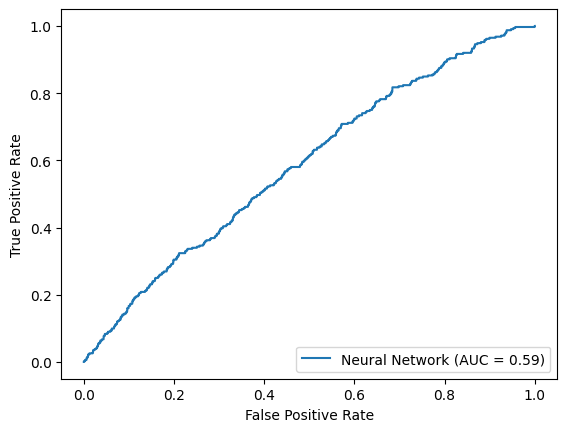

AUC on training set is 0.5222002996413742
AUC on test set is 0.6046993170627373
312.0
17335.0
Sensitivity on test set is 1.0
Specificity on test set is 0.0


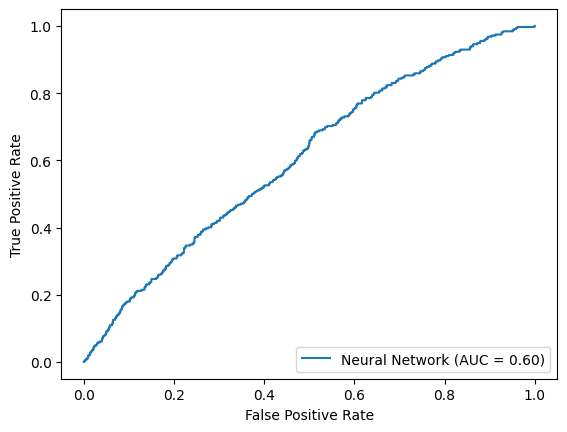

AUC on training set is 0.5412333846702073
AUC on test set is 0.6181809828934308
312.0
17335.0
Sensitivity on test set is 1.0
Specificity on test set is 0.0


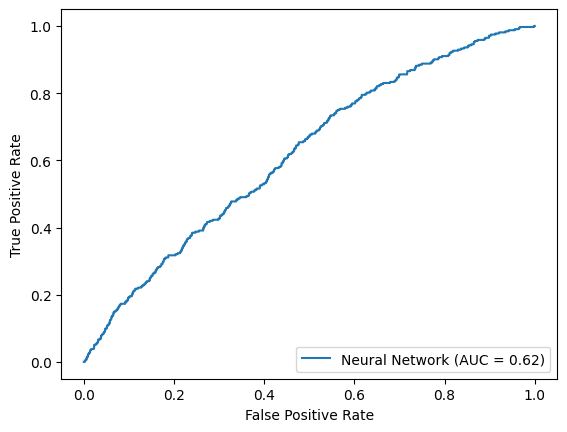

AUC on training set is 0.5501964133749235
AUC on test set is 0.6360332438616231
312.0
17335.0
Sensitivity on test set is 1.0
Specificity on test set is 0.0


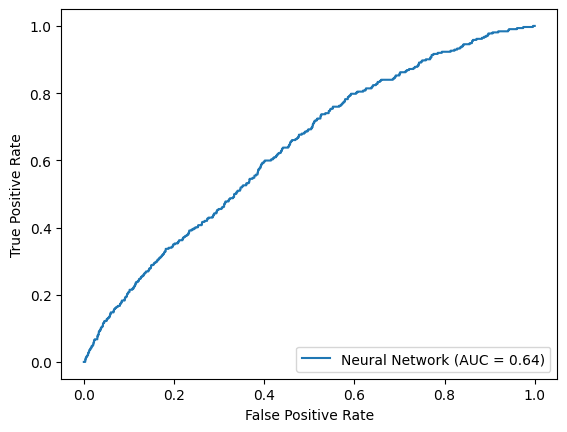

AUC on training set is 0.5751014076147798
AUC on test set is 0.6567519133239043
312.0
17335.0
Sensitivity on test set is 1.0
Specificity on test set is 0.0


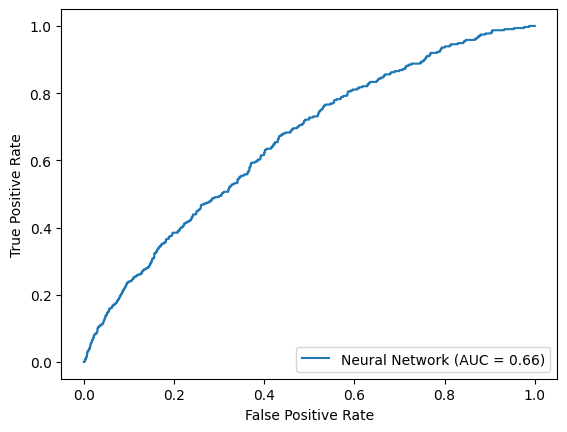

AUC on training set is 0.615707344427305
AUC on test set is 0.6774710534917314
312.0
17335.0
Sensitivity on test set is 1.0
Specificity on test set is 0.0


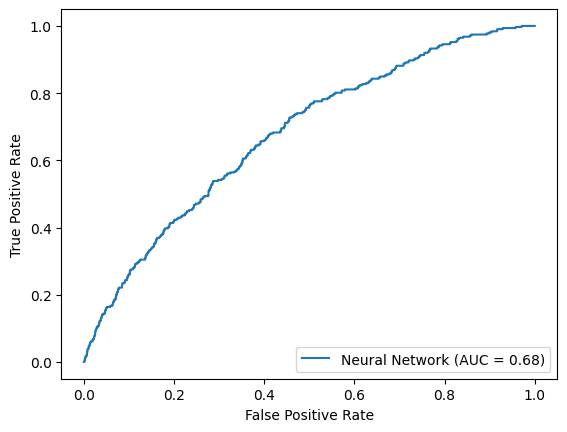

AUC on training set is 0.6641967406373257
AUC on test set is 0.696608717165464
312.0
17335.0
Sensitivity on test set is 1.0
Specificity on test set is 0.0


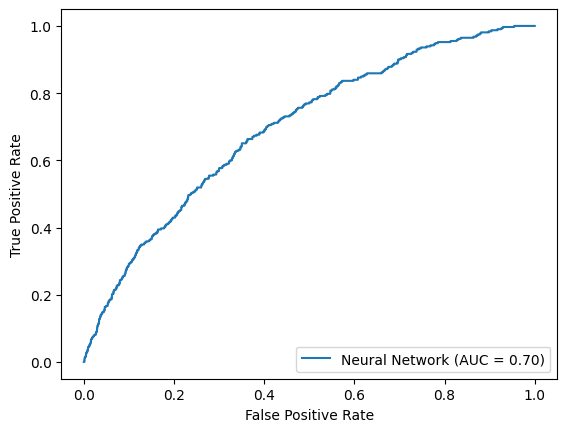

AUC on training set is 0.7033431410356543
AUC on test set is 0.7128305482627577
312.0
17335.0
Sensitivity on test set is 1.0
Specificity on test set is 0.0


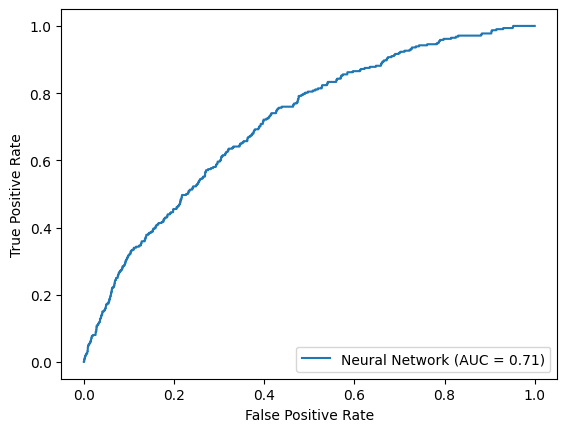

AUC on training set is 0.7591583132379168
AUC on test set is 0.7221892100732492
312.0
17335.0
Sensitivity on test set is 1.0
Specificity on test set is 0.0


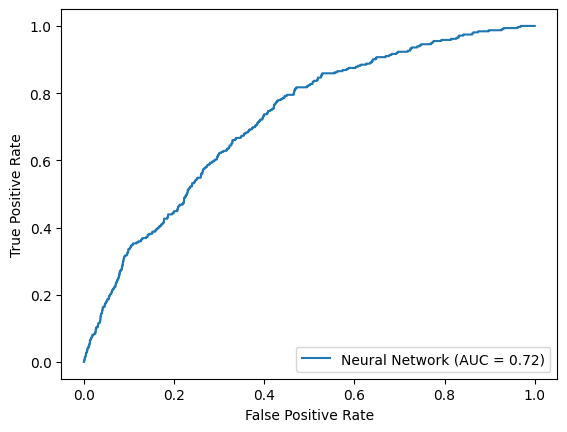

AUC on training set is 0.7764813047539085
AUC on test set is 0.7218824983393508
312.0
17329.0
Sensitivity on test set is 1.0
Specificity on test set is 0.00035246431298830994


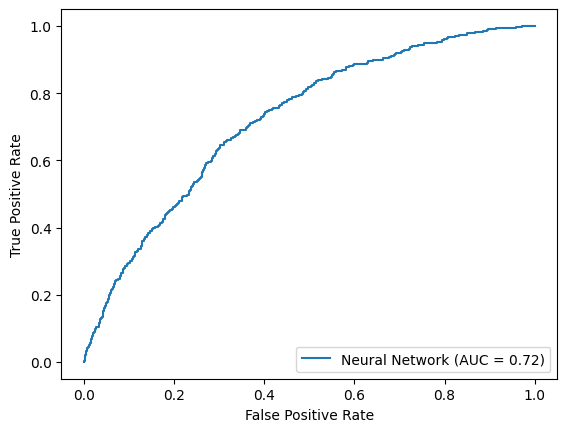

AUC on training set is 0.7929060535205217
AUC on test set is 0.7182178673800304
312.0
17308.0
Sensitivity on test set is 1.0
Specificity on test set is 0.0015860894084473948


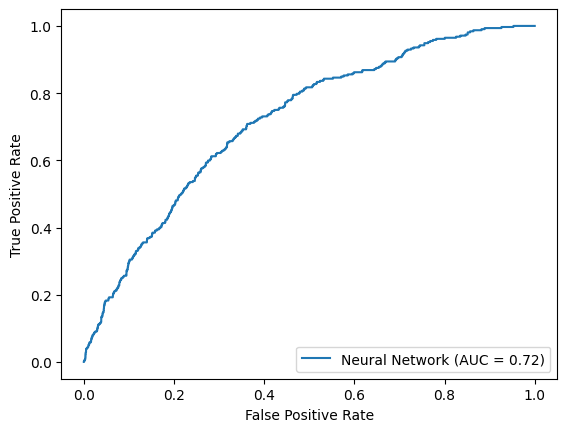

AUC on training set is 0.8113220384074669
AUC on test set is 0.7173780345445151
312.0
17255.0
Sensitivity on test set is 1.0
Specificity on test set is 0.0046995241731774655


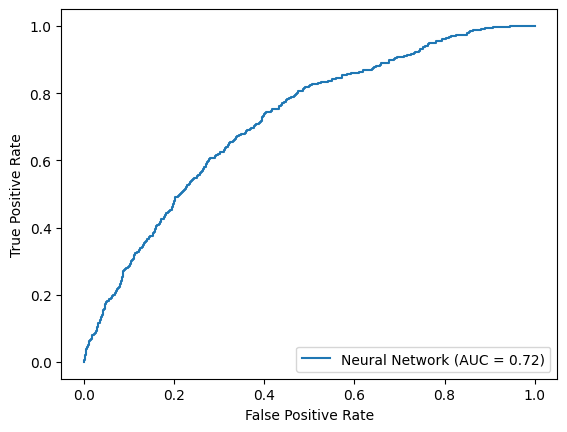

AUC on training set is 0.812637418682717
AUC on test set is 0.7218982199045936
312.0
17192.0
Sensitivity on test set is 1.0
Specificity on test set is 0.00840039945955472


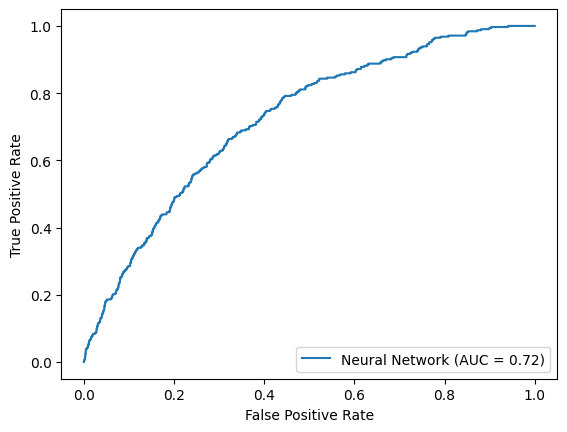

AUC on training set is 0.8264708655104074
AUC on test set is 0.729089000251545
312.0
17157.0
Sensitivity on test set is 1.0
Specificity on test set is 0.010456441285319862


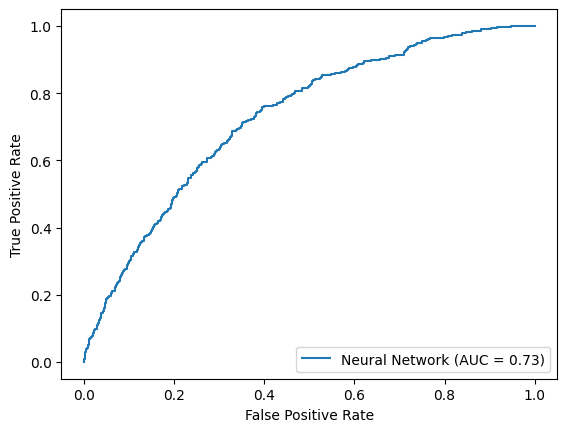

AUC on training set is 0.8353323238844195
AUC on test set is 0.7365726535893369
312.0
17125.0
Sensitivity on test set is 1.0
Specificity on test set is 0.012336250954590847


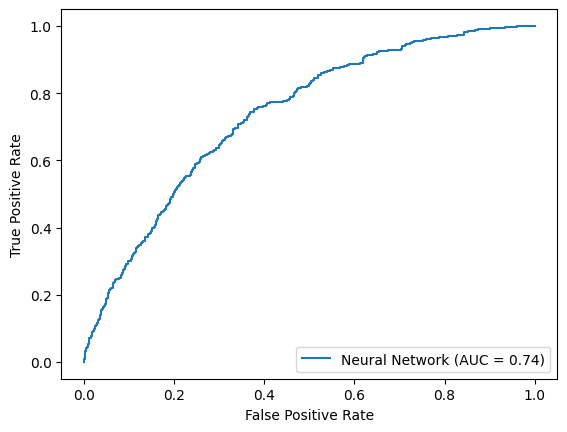

AUC on training set is 0.8463205810829721
AUC on test set is 0.741538220537222
312.0
17019.0
Sensitivity on test set is 1.0
Specificity on test set is 0.01856312048405099


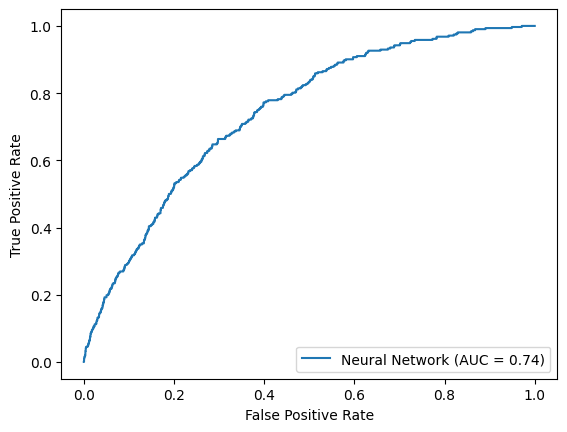

AUC on training set is 0.8495628484154721
AUC on test set is 0.7449728647666732
312.0
16729.0
Sensitivity on test set is 0.9967948717948718
Specificity on test set is 0.035540151559654586


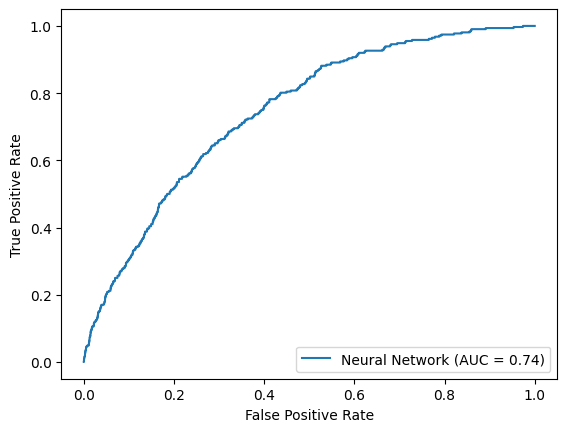

AUC on training set is 0.8563300257253876
AUC on test set is 0.7478383318496693
312.0
16210.0
Sensitivity on test set is 0.9935897435897436
Specificity on test set is 0.06596957058097867


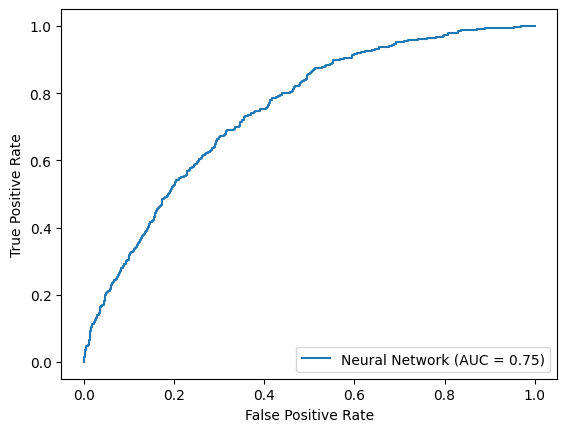

AUC on training set is 0.862204757040718
AUC on test set is 0.7502280097665752
312.0
15369.0
Sensitivity on test set is 0.9903846153846154
Specificity on test set is 0.11531457439934206


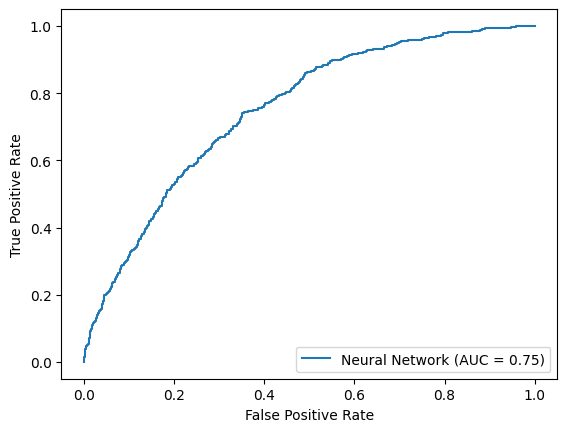

AUC on training set is 0.8698827621597611
AUC on test set is 0.7503166906914777
312.0
14142.0
Sensitivity on test set is 0.9647435897435898
Specificity on test set is 0.1869235739881337


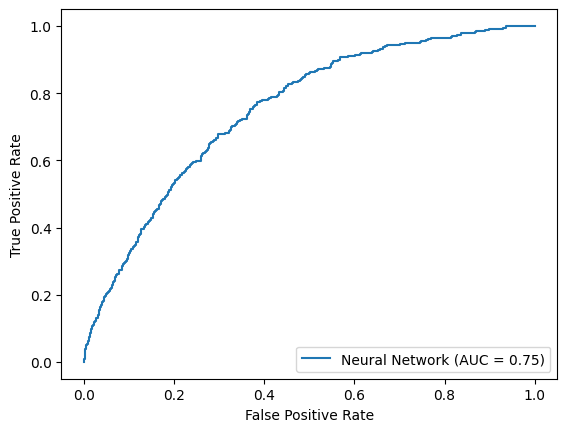

AUC on training set is 0.8762632094821078
AUC on test set is 0.7487616678490789
312.0
12767.0
Sensitivity on test set is 0.9423076923076923
Specificity on test set is 0.26728543734946836


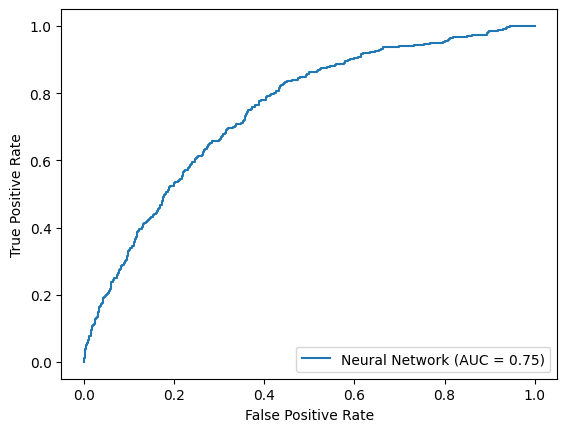

AUC on training set is 0.883278808244165
AUC on test set is 0.7481548342589288
312.0
11404.0
Sensitivity on test set is 0.9166666666666666
Specificity on test set is 0.3468836280326617


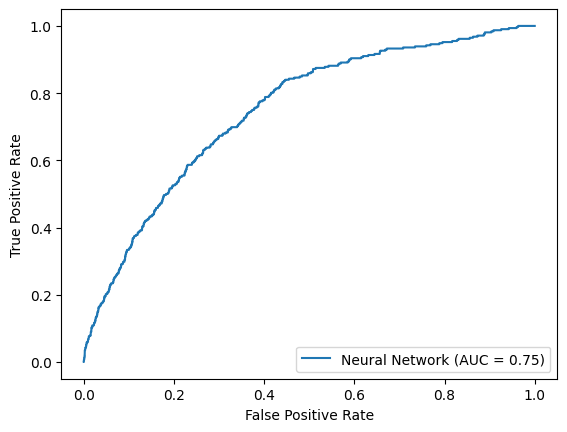

AUC on training set is 0.8855569583024173
AUC on test set is 0.7500968712014062
312.0
10282.0
Sensitivity on test set is 0.907051282051282
Specificity on test set is 0.41261822240498147


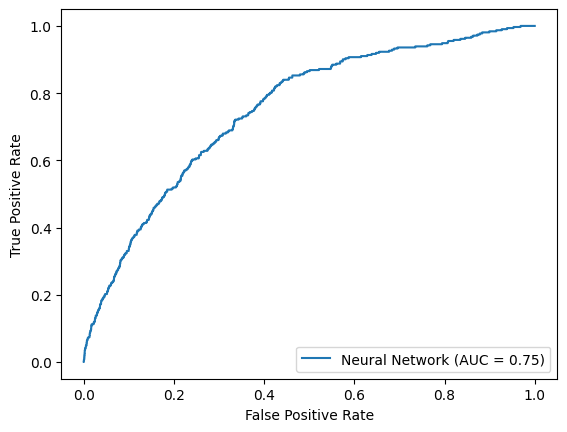

AUC on training set is 0.8976267170597884
AUC on test set is 0.7540519274827271
312.0
9548.0
Sensitivity on test set is 0.8782051282051282
Specificity on test set is 0.4552076602244023


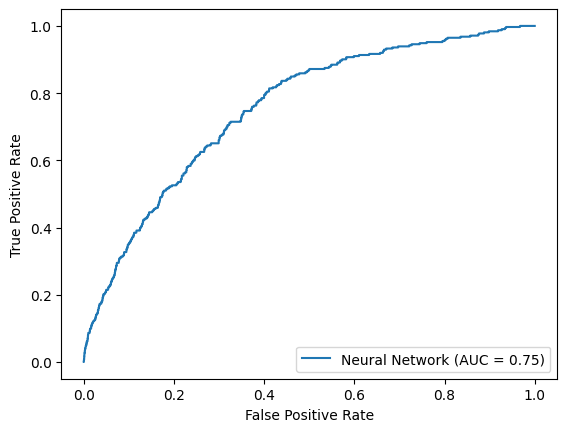

AUC on training set is 0.9026966401602425
AUC on test set is 0.7596944631471448
312.0
9288.0
Sensitivity on test set is 0.8782051282051282
Specificity on test set is 0.47048111378722907


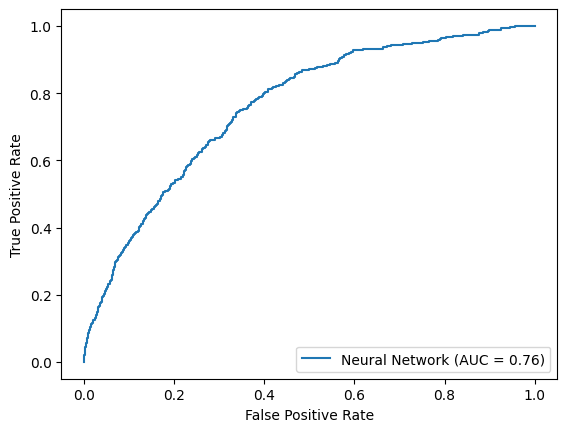

AUC on training set is 0.9108290040727794
AUC on test set is 0.7644587564034783
312.0
9145.0
Sensitivity on test set is 0.8814102564102564
Specificity on test set is 0.47894025729894846


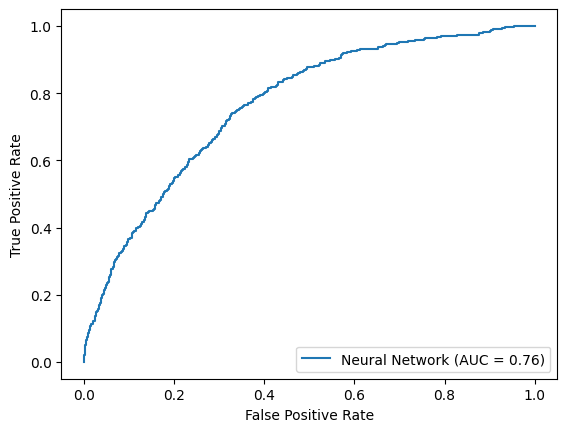

AUC on training set is 0.9140085749258016
AUC on test set is 0.767500926348515
312.0
8858.0
Sensitivity on test set is 0.8717948717948718
Specificity on test set is 0.4956235681137285


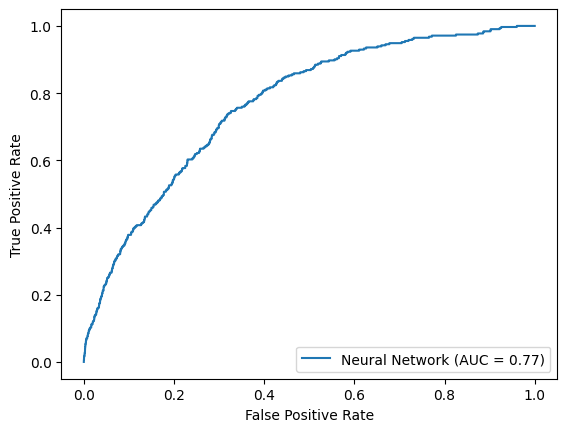

AUC on training set is 0.9202469763313418
AUC on test set is 0.7685660388584374
312.0
8293.0
Sensitivity on test set is 0.8525641025641025
Specificity on test set is 0.528461493273806


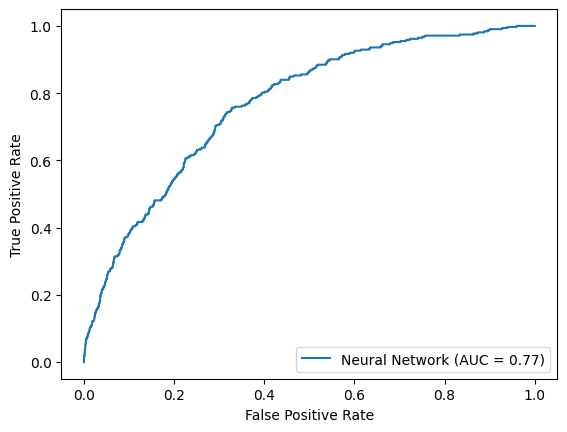

AUC on training set is 0.9239112880917977
AUC on test set is 0.7673023827491312
312.0
7445.0
Sensitivity on test set is 0.8205128205128205
Specificity on test set is 0.57768900898784


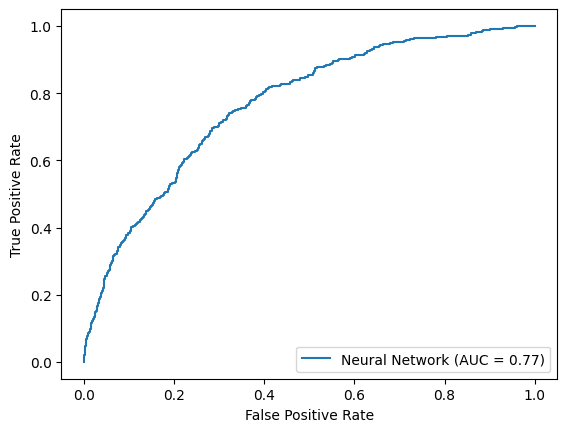

AUC on training set is 0.9306581259112092
AUC on test set is 0.7644494364336636
312.0
6566.0
Sensitivity on test set is 0.7660256410256411
Specificity on test set is 0.6283263819538272


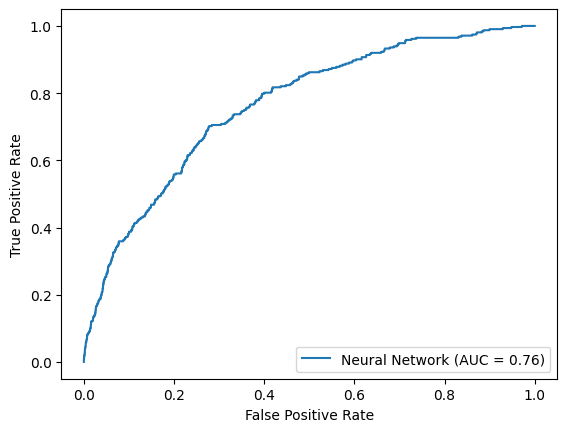

AUC on training set is 0.9307001015347366
AUC on test set is 0.7633918552124802
312.0
5996.0
Sensitivity on test set is 0.7339743589743589
Specificity on test set is 0.6612230511660694


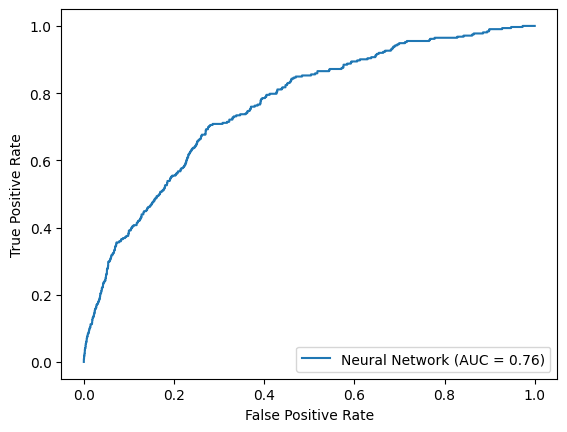

AUC on training set is 0.9346020548173676
AUC on test set is 0.7667034570121571
312.0
5805.0
Sensitivity on test set is 0.7275641025641025
Specificity on test set is 0.6723256770252012


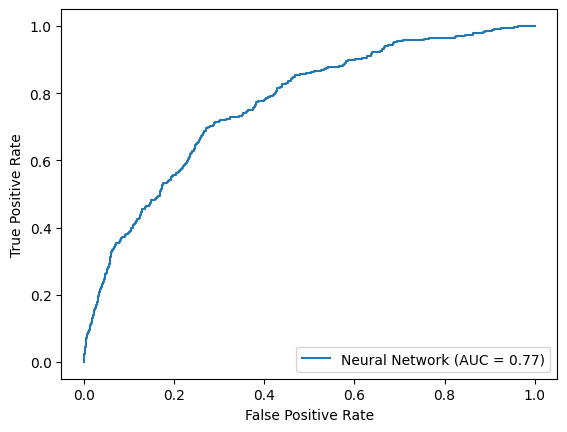

AUC on training set is 0.93672066699698
AUC on test set is 0.7711679108355664
312.0
5853.0
Sensitivity on test set is 0.7371794871794872
Specificity on test set is 0.6696821946777889


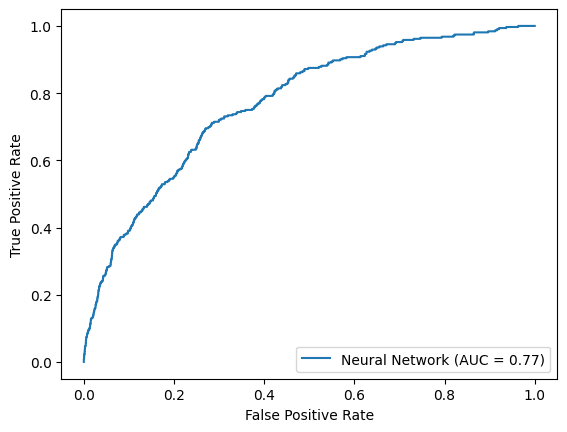

AUC on training set is 0.9426669170457947
AUC on test set is 0.773909582359914
312.0
5819.0
Sensitivity on test set is 0.7371794871794872
Specificity on test set is 0.6716794924513892


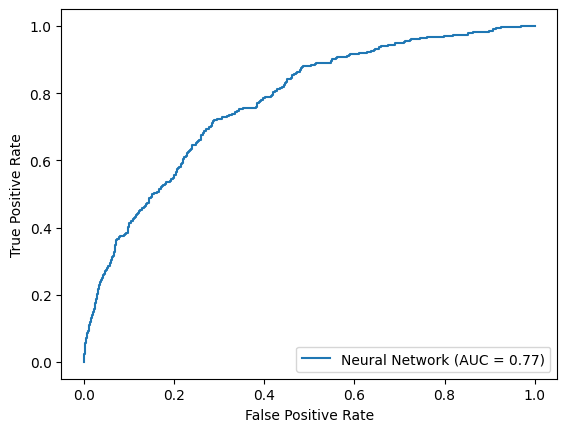

AUC on training set is 0.9479121411300296
AUC on test set is 0.7741063372782223
312.0
5362.0
Sensitivity on test set is 0.7211538461538461
Specificity on test set is 0.698231804029842


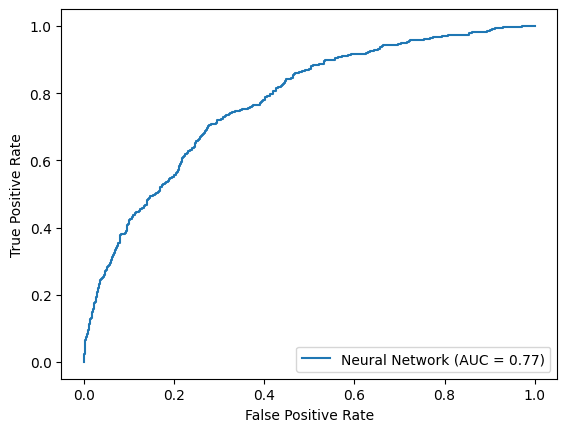

AUC on training set is 0.9505368761064682
AUC on test set is 0.7727231219601836
312.0
4742.0
Sensitivity on test set is 0.6762820512820513
Specificity on test set is 0.7338306996416613


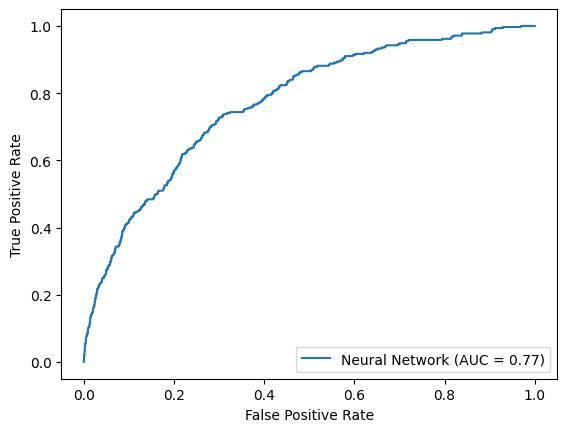

AUC on training set is 0.9558680853868083
AUC on test set is 0.7718354654411753
312.0
4210.0
Sensitivity on test set is 0.6314102564102564
Specificity on test set is 0.7642601186629854


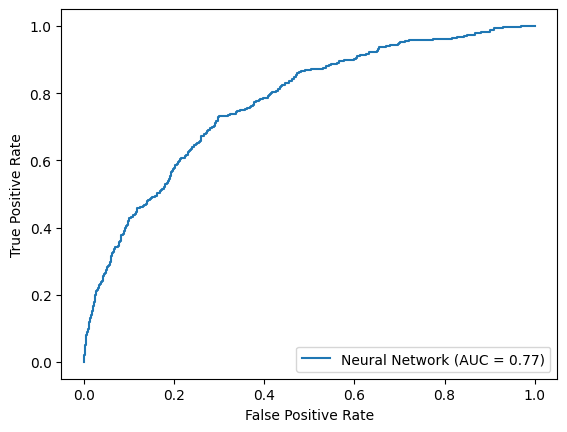

AUC on training set is 0.9546885474837609
AUC on test set is 0.7743603299909474
312.0
4243.0
Sensitivity on test set is 0.6282051282051282
Specificity on test set is 0.7622628208893849


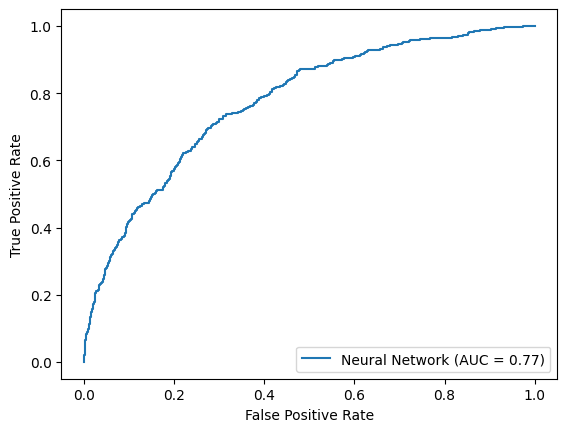

AUC on training set is 0.960084182100272
AUC on test set is 0.7759919836962662
312.0
4376.0
Sensitivity on test set is 0.6538461538461539
Specificity on test set is 0.7549198143687952


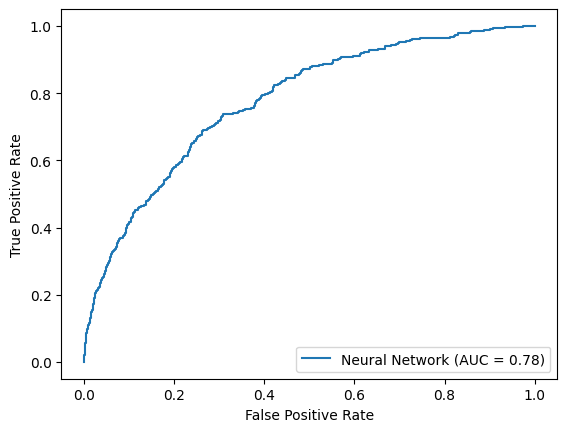

AUC on training set is 0.9646718050321528
AUC on test set is 0.7758265777673343
312.0
4142.0
Sensitivity on test set is 0.6217948717948718
Specificity on test set is 0.7680784820536921


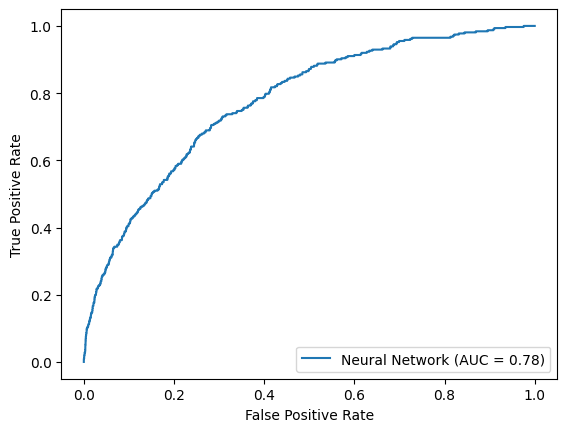

In [730]:
for epoch in range(num_epochs):
        train(model,device,train_loader,optimizer)
        test(model,device,test_loader)

AUC on training set is 0.966535741366293
AUC on test set is 0.7745471059516763
312.0
3609.0
Sensitivity on test set is 0.5705128205128205
Specificity on test set is 0.7984491570228515


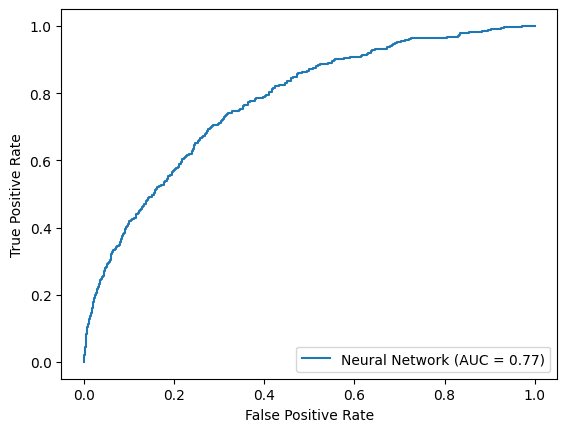

AUC on training set is 0.9684101271136797
AUC on test set is 0.7735874314841007
312.0
3269.0
Sensitivity on test set is 0.532051282051282
Specificity on test set is 0.817717206132879


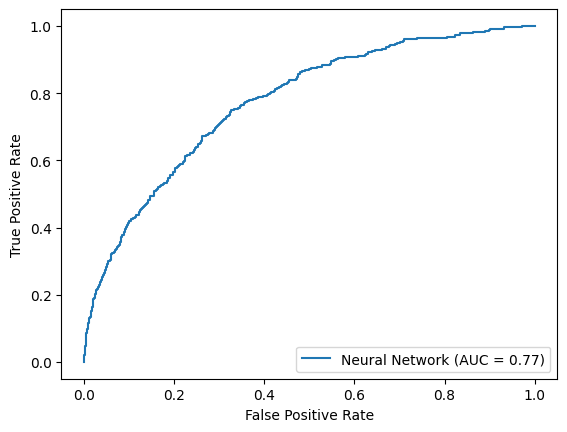

AUC on training set is 0.9702388252805222
AUC on test set is 0.7738922603958144
312.0
3275.0
Sensitivity on test set is 0.5416666666666666
Specificity on test set is 0.8175409739763849


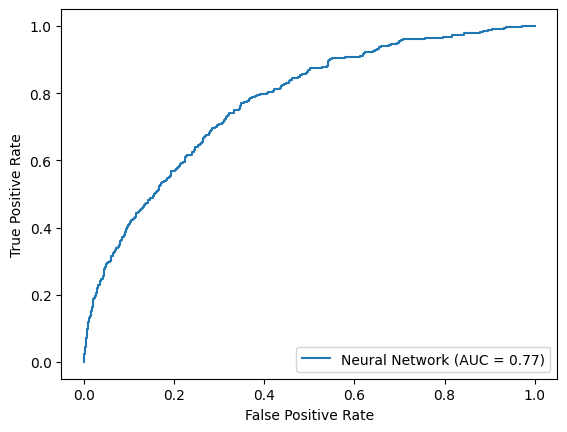

AUC on training set is 0.9743518516258576
AUC on test set is 0.7745858920886824
312.0
3251.0
Sensitivity on test set is 0.5384615384615384
Specificity on test set is 0.8188920871761735


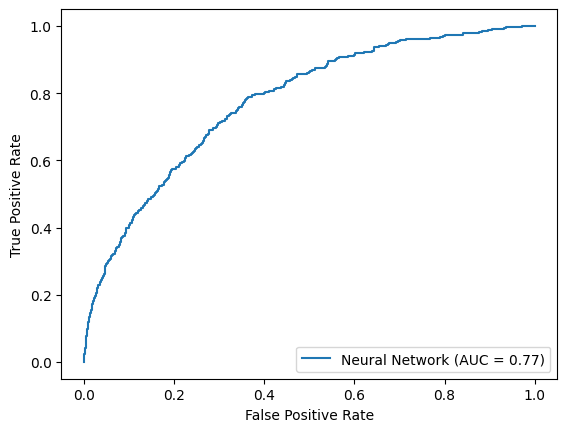

AUC on training set is 0.9757056735381603
AUC on test set is 0.7749042773201265
312.0
3065.0
Sensitivity on test set is 0.5128205128205128
Specificity on test set is 0.8293485284614933


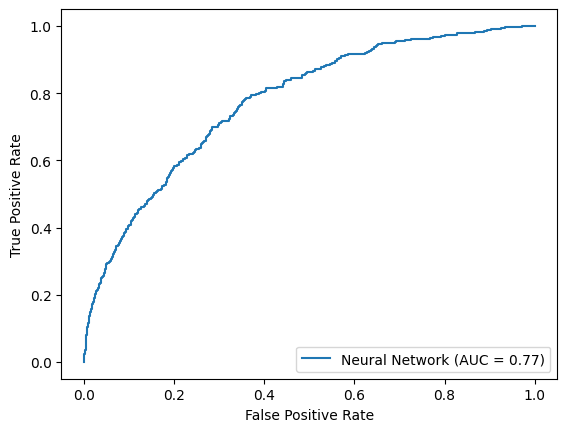

AUC on training set is 0.977129437873433
AUC on test set is 0.7741357093043046
312.0
2770.0
Sensitivity on test set is 0.4935897435897436
Specificity on test set is 0.8463255595370969


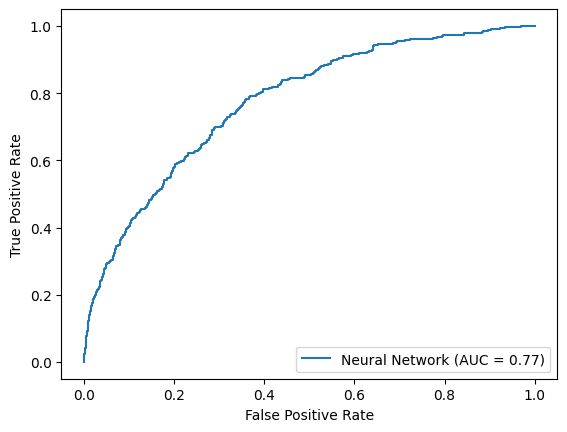

AUC on training set is 0.979691171278036
AUC on test set is 0.7731430854484957
312.0
2518.0
Sensitivity on test set is 0.4583333333333333
Specificity on test set is 0.860482876108794


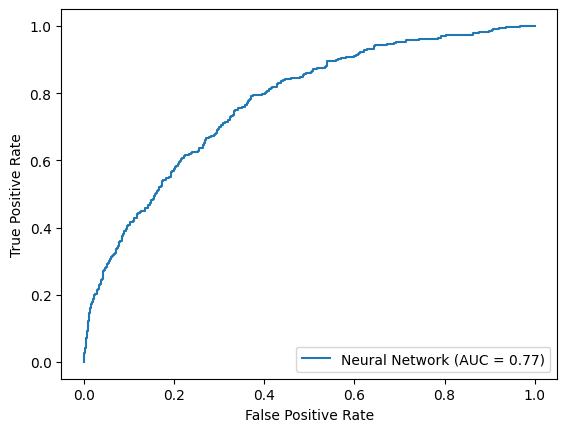

AUC on training set is 0.9807352481743274
AUC on test set is 0.7734449018447139
312.0
2497.0
Sensitivity on test set is 0.4551282051282051
Specificity on test set is 0.8616577571520884


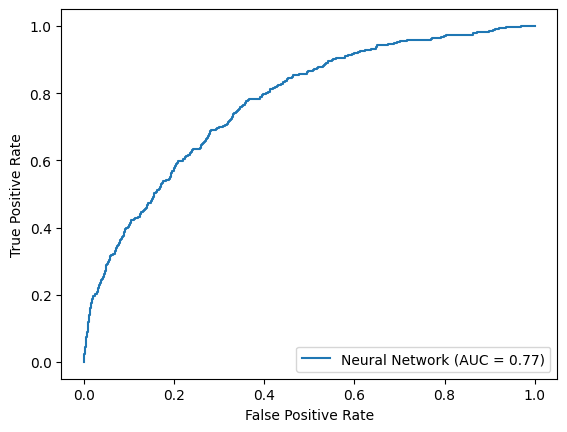

AUC on training set is 0.980443096817602
AUC on test set is 0.7763836107106976
312.0
2733.0
Sensitivity on test set is 0.48717948717948717
Specificity on test set is 0.848381601362862


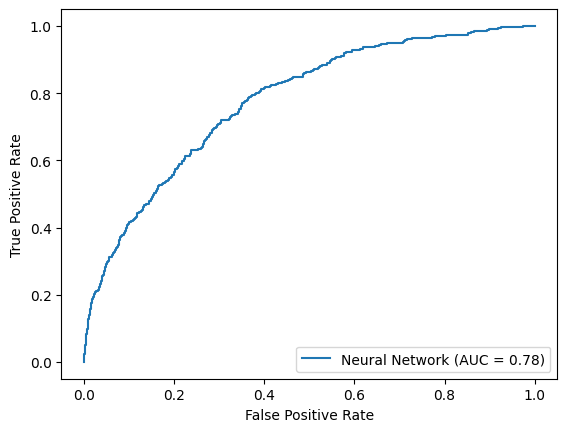

AUC on training set is 0.9830896458976063
AUC on test set is 0.7762691351218638
312.0
2540.0
Sensitivity on test set is 0.46794871794871795
Specificity on test set is 0.8593667391176644


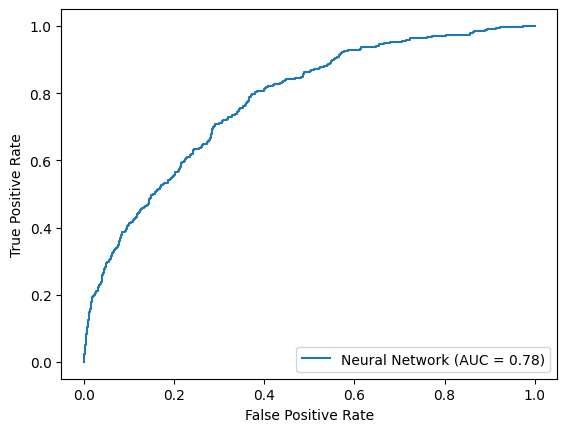

AUC on training set is 0.984139290729423
AUC on test set is 0.774182403294487
312.0
2095.0
Sensitivity on test set is 0.4198717948717949
Specificity on test set is 0.8846266815484932


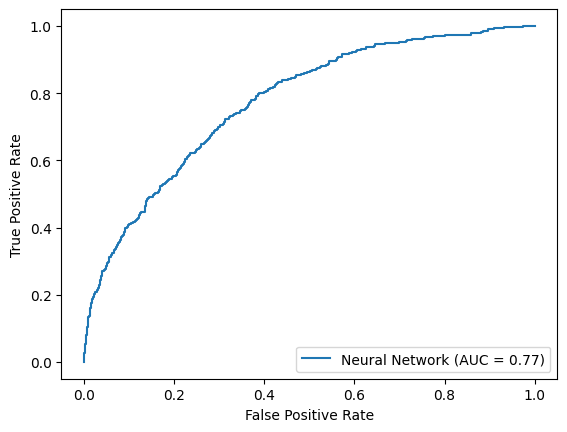

AUC on training set is 0.9872292915511384
AUC on test set is 0.7716447355538586
312.0
1724.0
Sensitivity on test set is 0.3942307692307692
Specificity on test set is 0.905950772484286


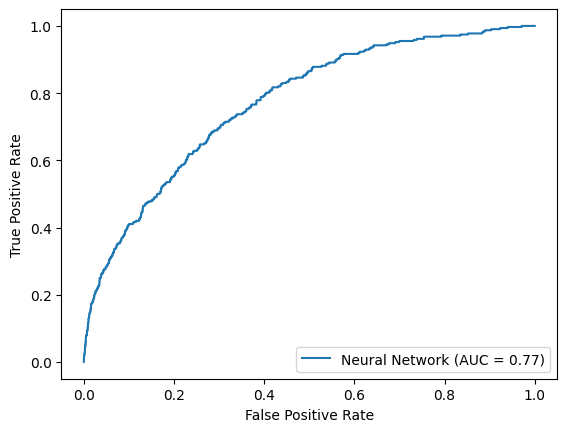

AUC on training set is 0.9873146157138022
AUC on test set is 0.7733844632525827
312.0
1836.0
Sensitivity on test set is 0.40064102564102566
Specificity on test set is 0.899488926746167


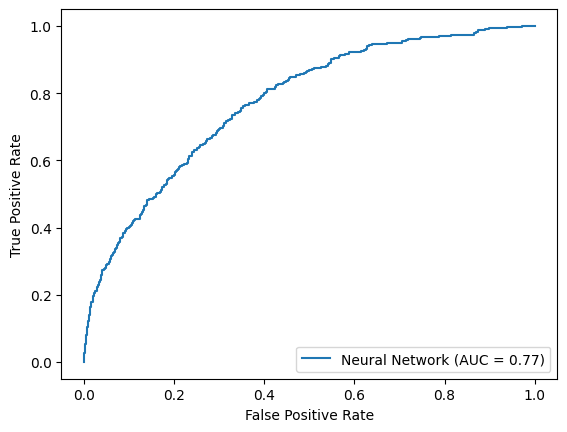

AUC on training set is 0.987253292149933
AUC on test set is 0.7761363961578378
312.0
2174.0
Sensitivity on test set is 0.4358974358974359
Specificity on test set is 0.8802796216883041


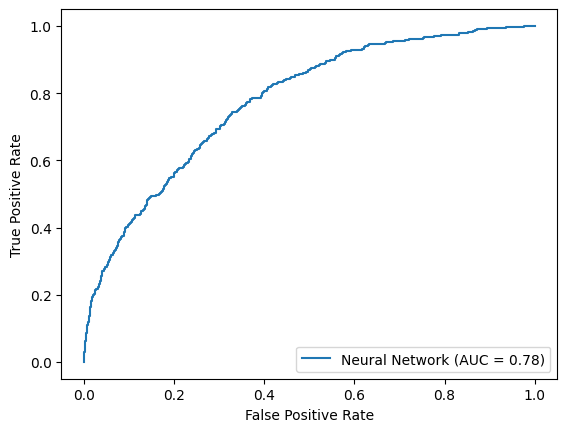

AUC on training set is 0.989223832838677
AUC on test set is 0.7756206911614302
312.0
2018.0
Sensitivity on test set is 0.42628205128205127
Specificity on test set is 0.889267461669506


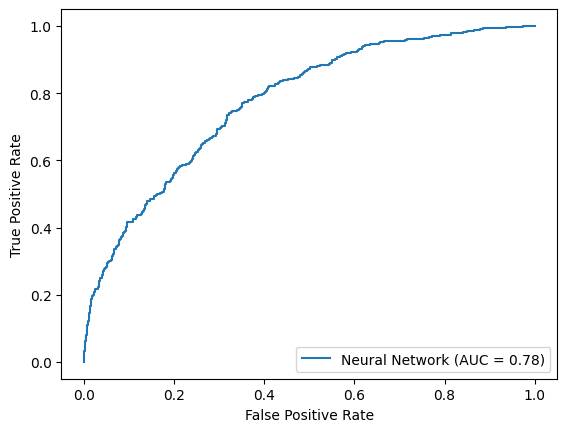

AUC on training set is 0.9891741027843949
AUC on test set is 0.7727998469642128
312.0
1643.0
Sensitivity on test set is 0.3782051282051282
Specificity on test set is 0.9104153204488046


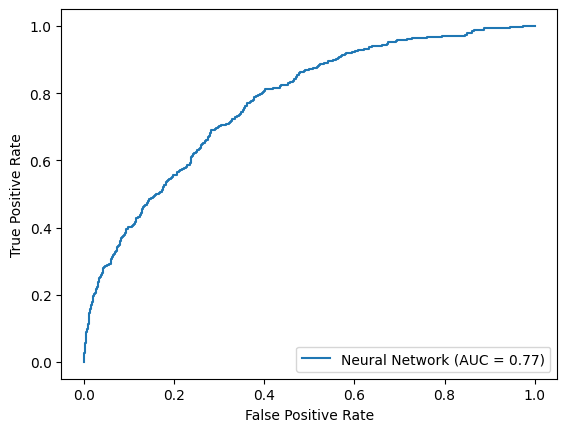

AUC on training set is 0.9904918729497795
AUC on test set is 0.7699276017213514
312.0
1392.0
Sensitivity on test set is 0.33653846153846156
Specificity on test set is 0.9243964048640075


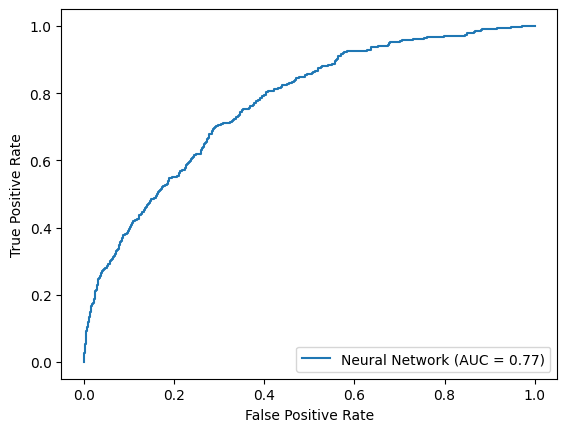

AUC on training set is 0.9907378282386977
AUC on test set is 0.7724058664220506
312.0
1425.0
Sensitivity on test set is 0.34294871794871795
Specificity on test set is 0.9225753392469013


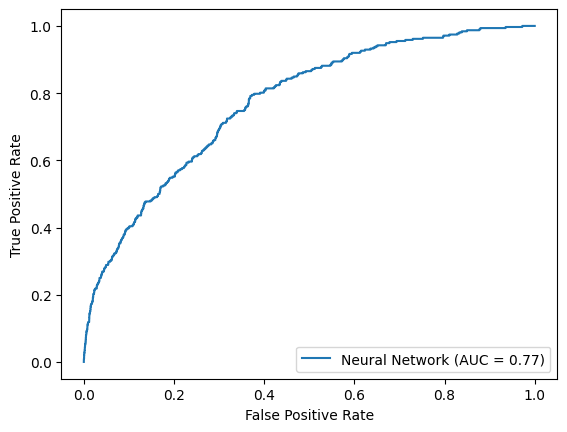

AUC on training set is 0.9912941895770687
AUC on test set is 0.7755297508499059
312.0
1678.0
Sensitivity on test set is 0.3942307692307692
Specificity on test set is 0.908652998883863


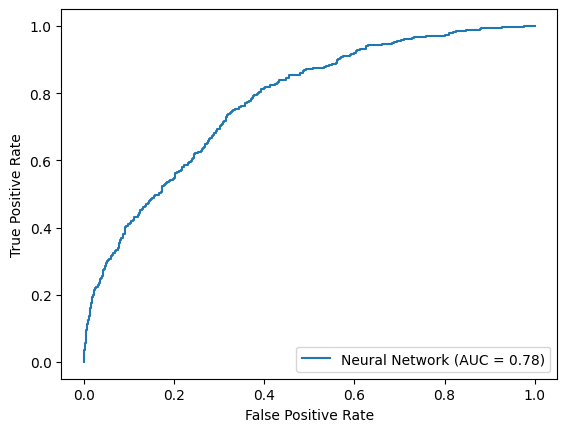

AUC on training set is 0.9916797500439334
AUC on test set is 0.7761577661896348
312.0
1659.0
Sensitivity on test set is 0.3782051282051282
Specificity on test set is 0.9094754156141691


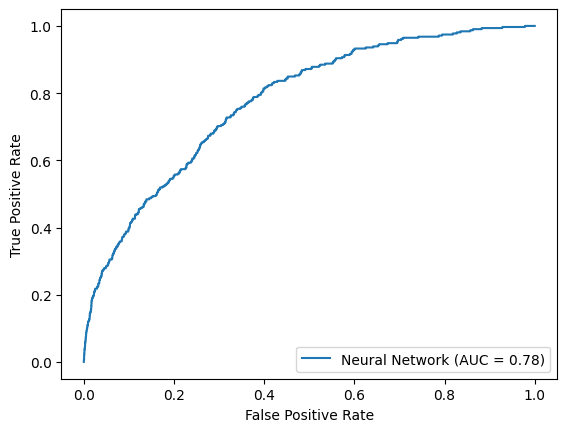

AUC on training set is 0.9925313390869682
AUC on test set is 0.7736936226553216
312.0
1353.0
Sensitivity on test set is 0.33653846153846156
Specificity on test set is 0.9266874228984315


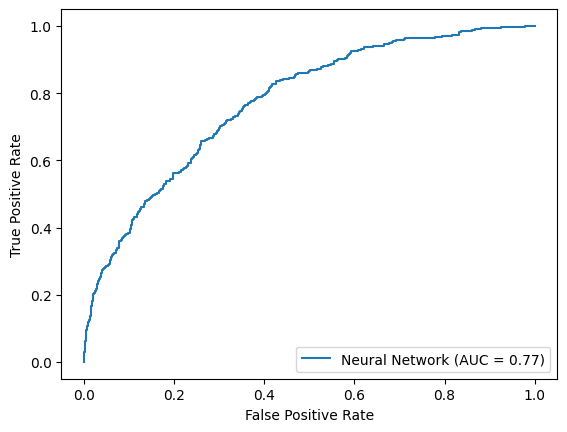

AUC on training set is 0.9923758691064294
AUC on test set is 0.7722157955224982
312.0
1115.0
Sensitivity on test set is 0.3108974358974359
Specificity on test set is 0.9401985548963168


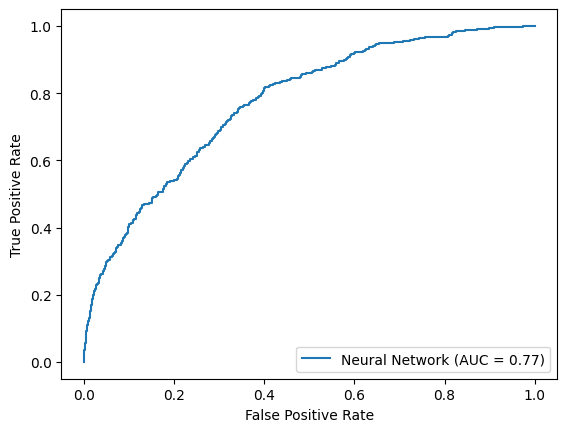

AUC on training set is 0.9932136781446479
AUC on test set is 0.7731575831793185
312.0
1157.0
Sensitivity on test set is 0.3141025641025641
Specificity on test set is 0.9377900487575633


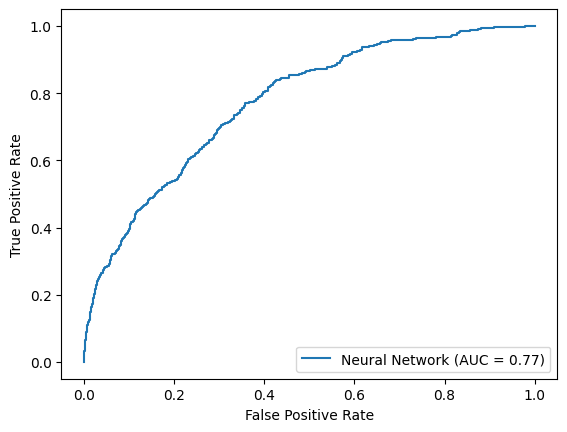

AUC on training set is 0.9939106107867641
AUC on test set is 0.7735900674351593
312.0
1226.0
Sensitivity on test set is 0.3108974358974359
Specificity on test set is 0.933677965106033


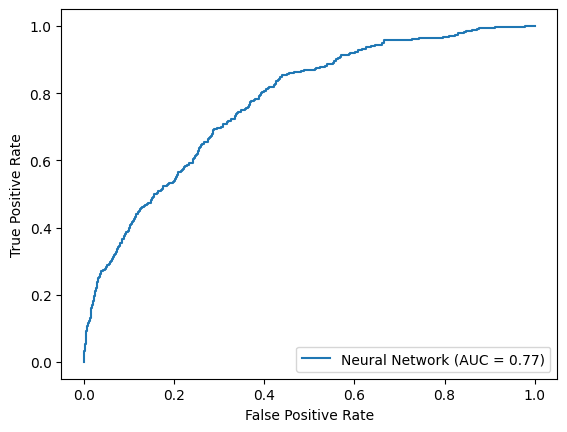

AUC on training set is 0.9941167769473842
AUC on test set is 0.7734801106195691
312.0
1209.0
Sensitivity on test set is 0.3141025641025641
Specificity on test set is 0.934735358044998


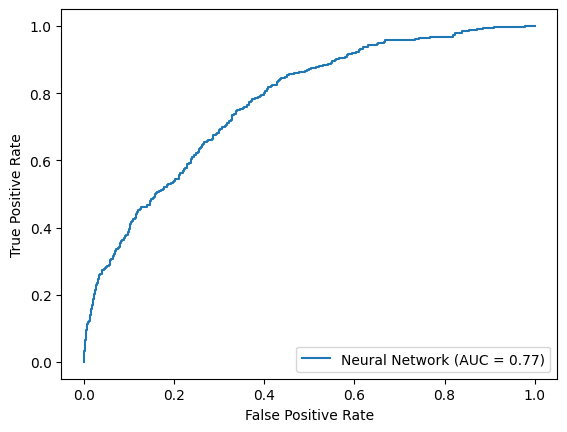

AUC on training set is 0.9946666550731571
AUC on test set is 0.771447792353332
312.0
1065.0
Sensitivity on test set is 0.2980769230769231
Specificity on test set is 0.9429007812958938


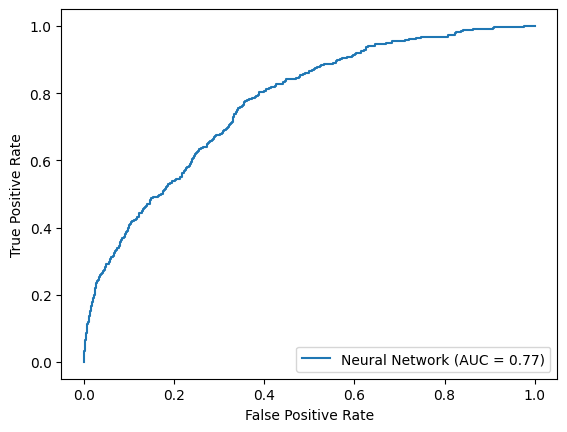

AUC on training set is 0.9949543063176084
AUC on test set is 0.7694414570332446
312.0
1005.0
Sensitivity on test set is 0.2948717948717949
Specificity on test set is 0.9463666803736122


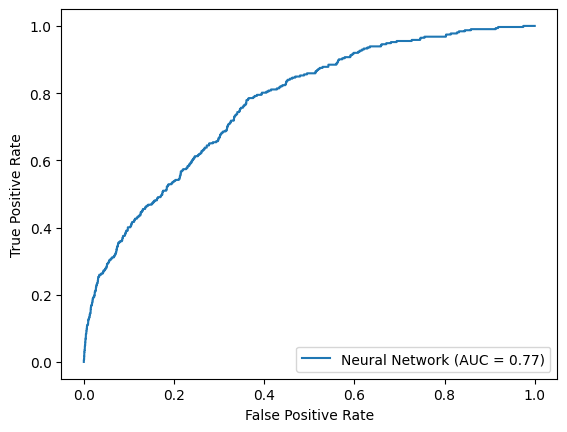

AUC on training set is 0.9952677632906367
AUC on test set is 0.7691208124151788
312.0
1032.0
Sensitivity on test set is 0.2948717948717949
Specificity on test set is 0.9447805909651648


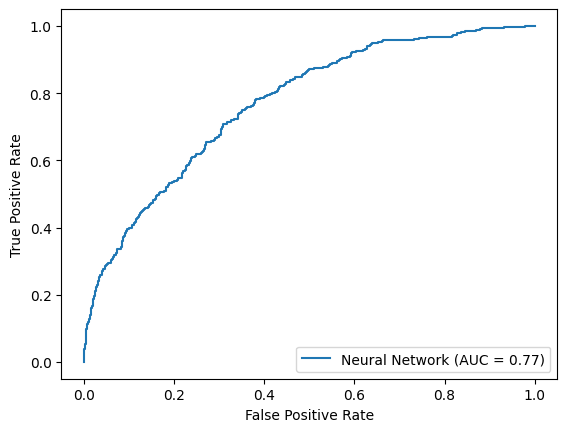

AUC on training set is 0.9953090778807229
AUC on test set is 0.7687907536861893
312.0
1035.0
Sensitivity on test set is 0.2916666666666667
Specificity on test set is 0.9445456147565059


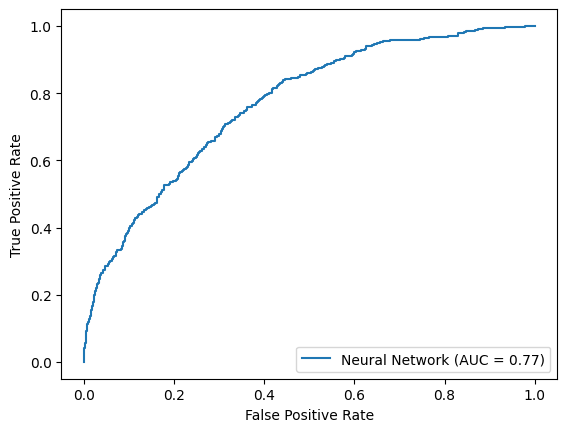

AUC on training set is 0.9957937425150675
AUC on test set is 0.7690291189747805
312.0
954.0
Sensitivity on test set is 0.28846153846153844
Specificity on test set is 0.9492451389296833


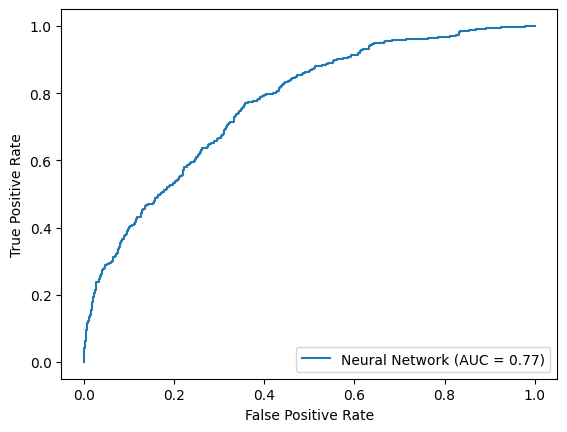

AUC on training set is 0.9961747265965686
AUC on test set is 0.7670515908341204
312.0
886.0
Sensitivity on test set is 0.27884615384615385
Specificity on test set is 0.95306350232039


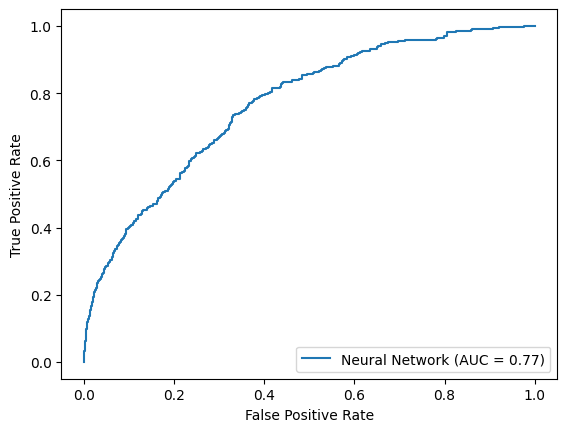

AUC on training set is 0.9963627906106403
AUC on test set is 0.7672690567964608
312.0
859.0
Sensitivity on test set is 0.2724358974358974
Specificity on test set is 0.954532103624508


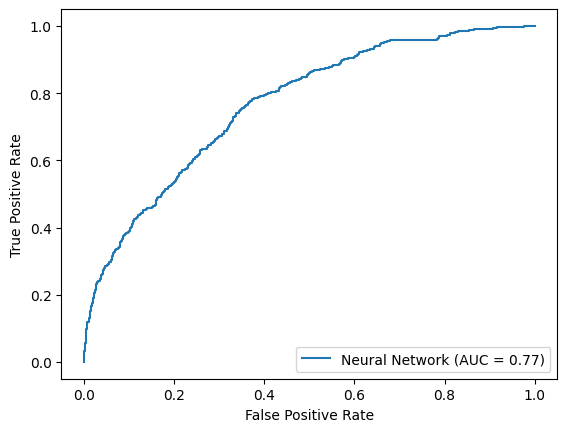

AUC on training set is 0.9968201749033467
AUC on test set is 0.7669214878211529
312.0
835.0
Sensitivity on test set is 0.28205128205128205
Specificity on test set is 0.9561181930329554


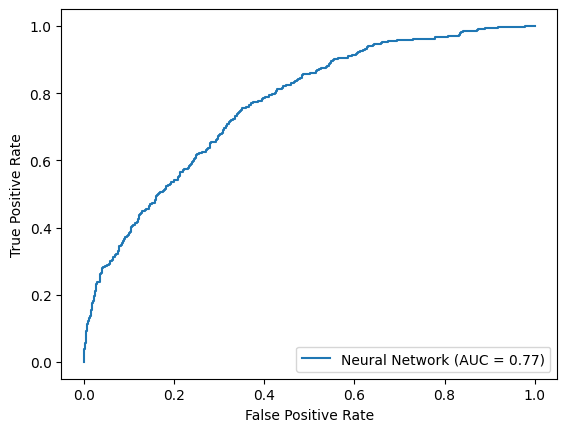

AUC on training set is 0.9967282912549954
AUC on test set is 0.7661418111544412
312.0
821.0
Sensitivity on test set is 0.28205128205128205
Specificity on test set is 0.9569406097632615


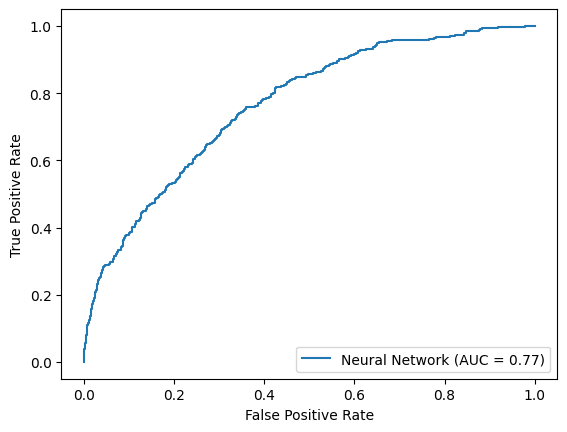

AUC on training set is 0.9971184026828601
AUC on test set is 0.766885149352987
312.0
799.0
Sensitivity on test set is 0.27884615384615385
Specificity on test set is 0.9581742348587206


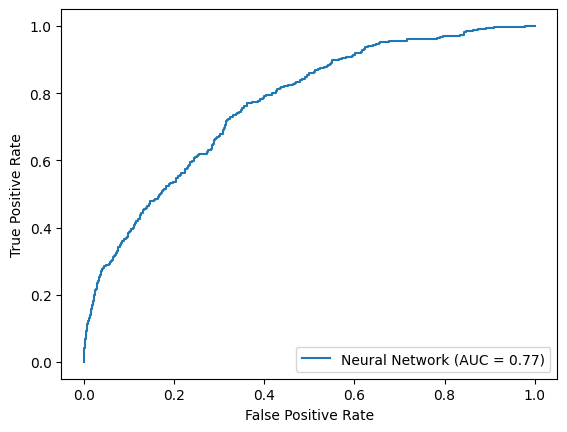

AUC on training set is 0.9971059193205635
AUC on test set is 0.7670197711391978
312.0
803.0
Sensitivity on test set is 0.2692307692307692
Specificity on test set is 0.9577630264935675


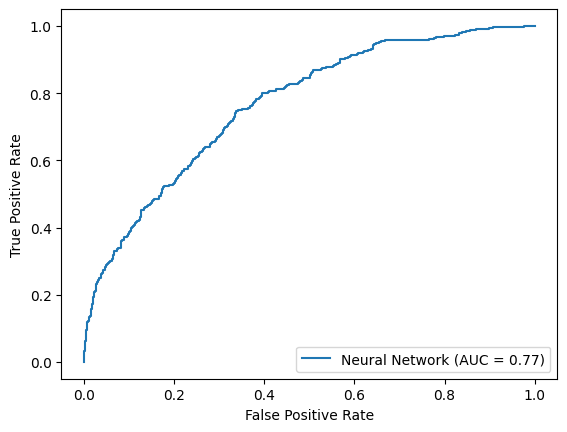

AUC on training set is 0.9973283570735867
AUC on test set is 0.7664873090253459
312.0
781.0
Sensitivity on test set is 0.26282051282051283
Specificity on test set is 0.9589379075368619


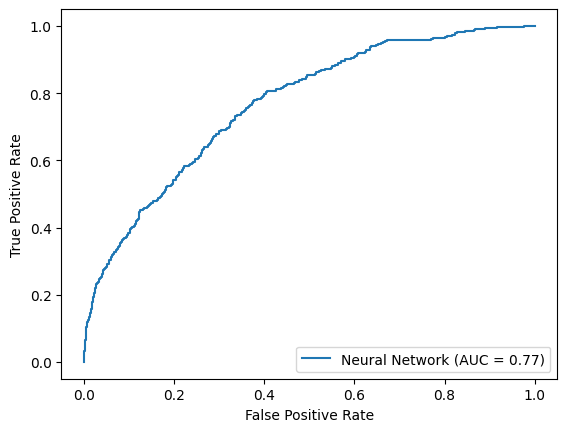

AUC on training set is 0.997484462663204
AUC on test set is 0.7657553619010178
312.0
744.0
Sensitivity on test set is 0.2564102564102564
Specificity on test set is 0.960993949362627


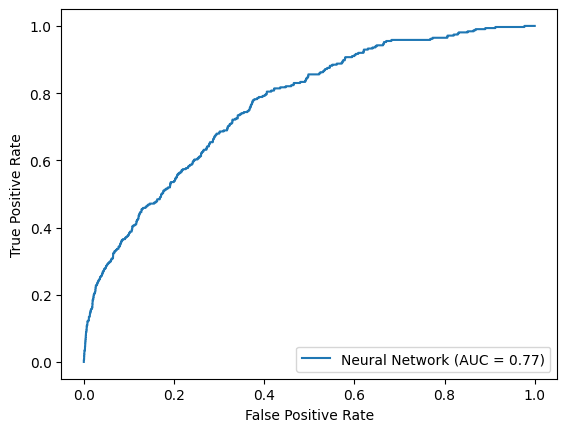

AUC on training set is 0.9974513347180459
AUC on test set is 0.7651301707945661
312.0
705.0
Sensitivity on test set is 0.266025641025641
Specificity on test set is 0.9634611995535453


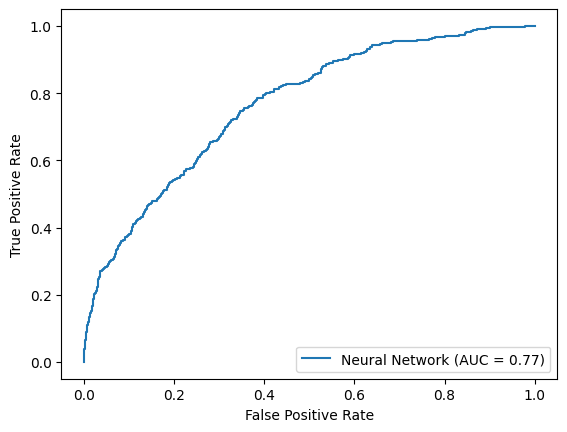

AUC on training set is 0.9976136692766301
AUC on test set is 0.7652437991134168
312.0
695.0
Sensitivity on test set is 0.26282051282051283
Specificity on test set is 0.9639898960230276


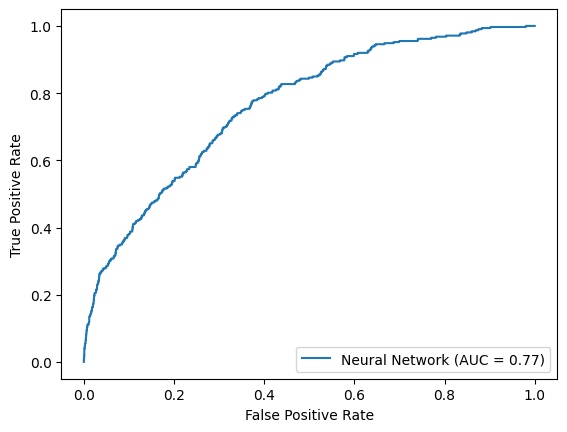

In [731]:
for epoch in range(num_epochs):
        train(model,device,train_loader,optimizer)
        test(model,device,test_loader)

In [276]:
model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.0177, -0.0138, -0.0215,  ...,  0.0165, -0.0190,  0.0135],
                      [-0.0147,  0.0093, -0.0098,  ..., -0.0172, -0.0193, -0.0123],
                      [-0.0052,  0.0147, -0.0187,  ..., -0.0105, -0.0179,  0.0076],
                      ...,
                      [ 0.0227, -0.0211,  0.0139,  ...,  0.0070, -0.0082, -0.0089],
                      [ 0.0110, -0.0095,  0.0072,  ...,  0.0058, -0.0194, -0.0197],
                      [ 0.0069,  0.0088,  0.0220,  ...,  0.0027, -0.0078, -0.0005]])),
             ('fc1.bias',
              tensor([ 1.2407e-02, -2.0904e-02,  1.6846e-02,  1.3356e-02, -9.9483e-05,
                       6.7663e-03,  1.9310e-02, -1.9081e-02,  1.4602e-02,  1.5108e-03,
                       2.0197e-02, -4.4397e-03,  1.6787e-02, -8.3145e-03,  1.8119e-02,
                       1.0824e-02, -9.2754e-03, -5.1332e-03,  6.1044e-03,  5.8144e-03,
                       8.6605e-03,  1.0040e-02, -2.2288e-02, -1.

In [269]:
#best_state = copy.deepcopy(model.state_dict())

In [514]:
best_state

OrderedDict([('fc1.weight',
              tensor([[-0.0186,  0.0148, -0.0161,  ..., -0.0013, -0.0022,  0.0036],
                      [ 0.0133,  0.0053, -0.0213,  ..., -0.0171,  0.0185,  0.0182],
                      [-0.0090, -0.0149,  0.0062,  ..., -0.0066,  0.0007,  0.0049],
                      ...,
                      [-0.0086,  0.0013, -0.0244,  ...,  0.0005,  0.0063,  0.0097],
                      [-0.0092,  0.0190, -0.0058,  ..., -0.0017, -0.0070,  0.0174],
                      [ 0.0026, -0.0241,  0.0192,  ...,  0.0041,  0.0071,  0.0178]])),
             ('fc1.bias',
              tensor([-1.9494e-03, -2.4522e-02,  6.4465e-03,  3.1679e-03,  2.3120e-02,
                       1.1546e-02,  4.7795e-03,  1.6189e-02,  1.7316e-02, -1.1932e-02,
                       6.1176e-03, -9.6732e-03,  4.8962e-03,  9.0550e-03,  3.1958e-03,
                      -1.2748e-02,  1.7035e-03,  5.2843e-03,  4.4597e-03,  2.5248e-05,
                      -1.0682e-02,  1.0964e-02, -2.4829e-02,  4.

In [525]:
model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[-0.0079, -0.0223,  0.0149,  ..., -0.0110,  0.0013, -0.0169],
                      [-0.0070, -0.0232, -0.0014,  ...,  0.0033, -0.0249, -0.0025],
                      [ 0.0064,  0.0124, -0.0171,  ..., -0.0333,  0.0045, -0.0335],
                      ...,
                      [-0.0047, -0.0136,  0.0184,  ..., -0.0202, -0.0127,  0.0225],
                      [ 0.0243, -0.0022, -0.0192,  ..., -0.0065,  0.0281, -0.0010],
                      [ 0.0129, -0.0289,  0.0227,  ..., -0.0023,  0.0011,  0.0083]])),
             ('fc1.bias',
              tensor([ 0.0211, -0.0085, -0.0074,  0.0100, -0.0070,  0.0161, -0.0078,  0.0206,
                      -0.0097,  0.0019,  0.0004, -0.0065,  0.0100, -0.0036, -0.0058, -0.0095,
                       0.0159, -0.0148,  0.0050, -0.0201, -0.0168, -0.0062, -0.0224,  0.0205,
                       0.0087,  0.0139,  0.0278,  0.0183, -0.0105, -0.0160, -0.0081,  0.0154,
                      -0.0135, -0.01

In [538]:
#model = LinearModel(2003, 120, 40, 1)
#model.load_state_dict(torch.load("/home/ffc4001/ukbiobankdata/Data/finalnnmodel1.pickle"))
#model.eval()

LinearModel(
  (fc1): Linear(in_features=2003, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=40, bias=True)
  (fc3): Linear(in_features=40, out_features=1, bias=True)
  (lrelu1): LeakyReLU(negative_slope=0.01)
  (lrelu2): LeakyReLU(negative_slope=0.01)
  (dropout1): Dropout(p=0.2, inplace=False)
  (dropout2): Dropout(p=0.2, inplace=False)
)

In [524]:
model

LinearModel(
  (fc1): Linear(in_features=2003, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=40, bias=True)
  (fc3): Linear(in_features=40, out_features=1, bias=True)
  (lrelu1): LeakyReLU(negative_slope=0.01)
  (lrelu2): LeakyReLU(negative_slope=0.01)
  (dropout1): Dropout(p=0.2, inplace=False)
  (dropout2): Dropout(p=0.2, inplace=False)
)

AUC on test set is 0.7856060503361215
312.0
5501.0
Sensitivity on test set is 0.7275641025641025
Specificity on test set is 0.6901838688832755


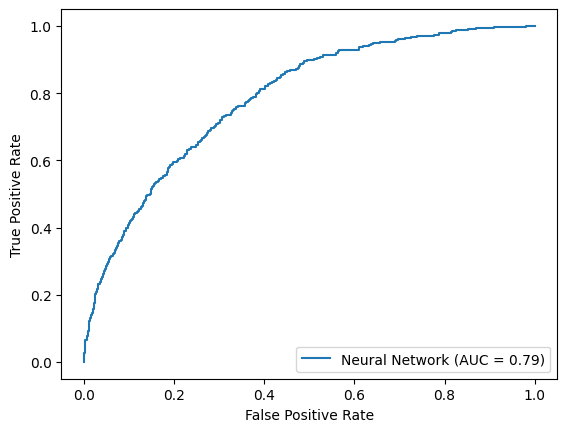

In [732]:
#This is correct GH model
model = torch.load("/home/ffc4001/ukbiobankdata/Data/finalfullnnmodel1.pickle")
model.eval()
test(model1,device,test_loader)

In [509]:
model2.eval()

LinearModel(
  (fc1): Linear(in_features=2003, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=40, bias=True)
  (fc3): Linear(in_features=40, out_features=1, bias=True)
  (lrelu1): LeakyReLU(negative_slope=0.01)
  (lrelu2): LeakyReLU(negative_slope=0.01)
  (dropout1): Dropout(p=0.2, inplace=False)
  (dropout2): Dropout(p=0.2, inplace=False)
)

AUC on test set is 0.7856060503361215
312.0
5501.0
Sensitivity on test set is 0.7275641025641025
Specificity on test set is 0.6901838688832755


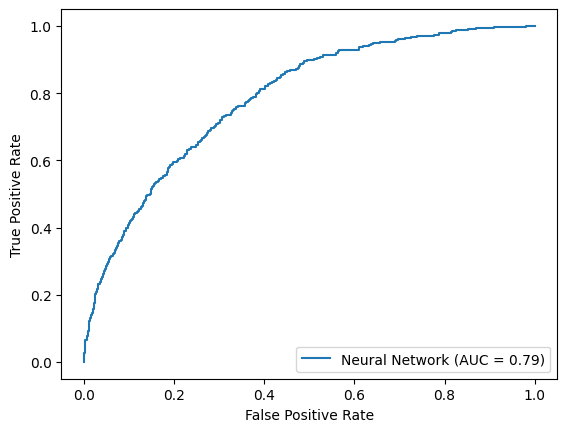

In [736]:
test(model,device,test_loader)

In [754]:
model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[-0.0079, -0.0223,  0.0149,  ..., -0.0110,  0.0013, -0.0169],
                      [-0.0070, -0.0232, -0.0014,  ...,  0.0033, -0.0249, -0.0025],
                      [ 0.0064,  0.0124, -0.0171,  ..., -0.0333,  0.0045, -0.0335],
                      ...,
                      [-0.0047, -0.0136,  0.0184,  ..., -0.0202, -0.0127,  0.0225],
                      [ 0.0243, -0.0022, -0.0192,  ..., -0.0065,  0.0281, -0.0010],
                      [ 0.0129, -0.0289,  0.0227,  ..., -0.0023,  0.0011,  0.0083]])),
             ('fc1.bias',
              tensor([ 0.0211, -0.0085, -0.0074,  0.0100, -0.0070,  0.0161, -0.0078,  0.0206,
                      -0.0097,  0.0019,  0.0004, -0.0065,  0.0100, -0.0036, -0.0058, -0.0095,
                       0.0159, -0.0148,  0.0050, -0.0201, -0.0168, -0.0062, -0.0224,  0.0205,
                       0.0087,  0.0139,  0.0278,  0.0183, -0.0105, -0.0160, -0.0081,  0.0154,
                      -0.0135, -0.01

In [767]:
#visualize weights
!pip install git+https://github.com/jzliu-100/visualize-neural-network.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/jzliu-100/visualize-neural-network.git to /tmp/pip-req-build-rog4rsst
  Running command git clone -q https://github.com/jzliu-100/visualize-neural-network.git /tmp/pip-req-build-rog4rsst
  Resolved https://github.com/jzliu-100/visualize-neural-network.git to commit 9e87f387529ac872de69f35f25b2eb3589caa8c8
ERROR: File "setup.py" not found for legacy project git+https://github.com/jzliu-100/visualize-neural-network.git.


In [763]:
np.hstack([2003,120,40,1])

array([2003,  120,   40])

Test_input.shape[1]

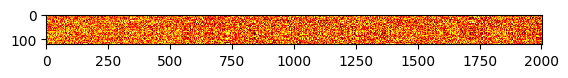

In [789]:
plt.imshow(np.asarray(model.state_dict()['fc1.weight']), cmap='hot', interpolation='nearest')
plt.show()

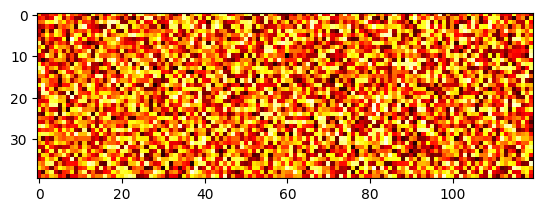

In [812]:
plt.imshow(np.asarray(model.state_dict()['fc2.weight']), cmap='hot', interpolation='nearest')
plt.show()

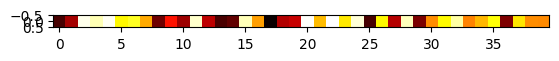

In [790]:
plt.imshow(np.asarray(model.state_dict()['fc3.weight']), cmap='hot', interpolation='nearest')
plt.show()

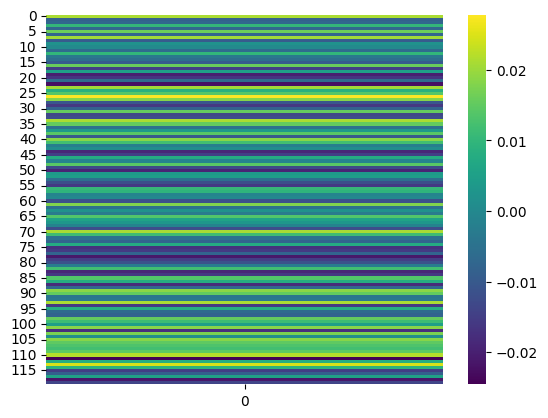

In [807]:
sns.heatmap(pd.DataFrame(model.state_dict()['fc1.bias']), fmt="g", cmap='viridis')

plt.show()

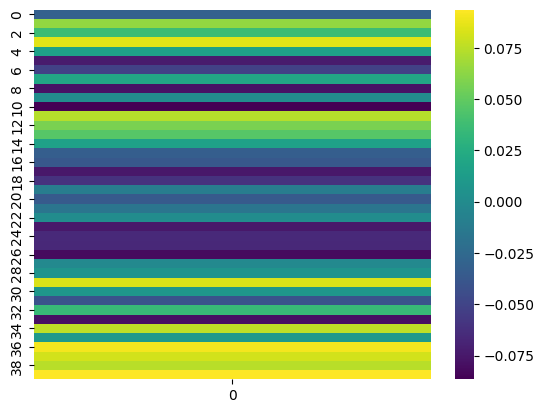

In [808]:
sns.heatmap(pd.DataFrame(model.state_dict()['fc2.bias']), fmt="g", cmap='viridis')

plt.show()

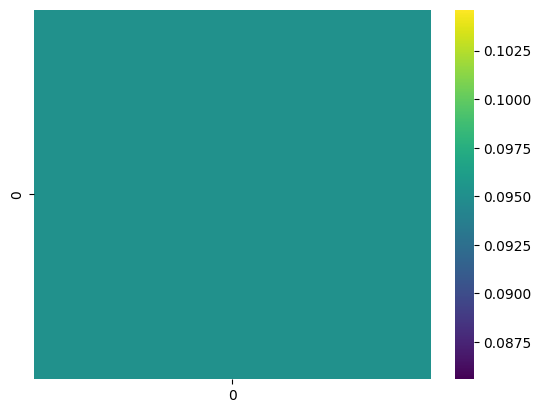

In [809]:
sns.heatmap(pd.DataFrame(model.state_dict()['fc3.bias']), fmt="g", cmap='viridis')

plt.show()

In [800]:
import seaborn as sns

In [811]:
pd.DataFrame(model.state_dict()['fc2.bias'])

,0
0,-0.031323
1,0.064263
2,0.037125
3,0.085221
4,0.015640
5,-0.073779
6,-0.051598
7,0.020897
8,-0.078050
9,0.000953


In [793]:
model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[-0.0079, -0.0223,  0.0149,  ..., -0.0110,  0.0013, -0.0169],
                      [-0.0070, -0.0232, -0.0014,  ...,  0.0033, -0.0249, -0.0025],
                      [ 0.0064,  0.0124, -0.0171,  ..., -0.0333,  0.0045, -0.0335],
                      ...,
                      [-0.0047, -0.0136,  0.0184,  ..., -0.0202, -0.0127,  0.0225],
                      [ 0.0243, -0.0022, -0.0192,  ..., -0.0065,  0.0281, -0.0010],
                      [ 0.0129, -0.0289,  0.0227,  ..., -0.0023,  0.0011,  0.0083]])),
             ('fc1.bias',
              tensor([ 0.0211, -0.0085, -0.0074,  0.0100, -0.0070,  0.0161, -0.0078,  0.0206,
                      -0.0097,  0.0019,  0.0004, -0.0065,  0.0100, -0.0036, -0.0058, -0.0095,
                       0.0159, -0.0148,  0.0050, -0.0201, -0.0168, -0.0062, -0.0224,  0.0205,
                       0.0087,  0.0139,  0.0278,  0.0183, -0.0105, -0.0160, -0.0081,  0.0154,
                      -0.0135, -0.01

AUC on test set is 0.7856060503361215
312.0
5501.0
Sensitivity on test set is 0.7275641025641025
Specificity on test set is 0.6901838688832755


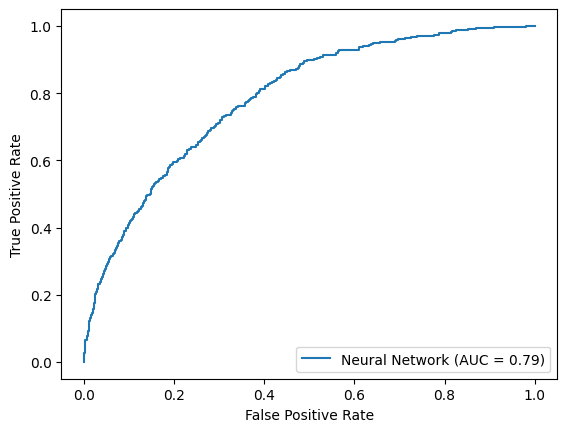

In [545]:
test(model,device,test_loader)







In [310]:
#Plot ROC
#probabilites = model
#y_score = probabilites.squeeze(-1).detach().numpy()
#fpr, tpr, threshold = roc_curve(y_true, y_score)

AttributeError: 'LinearModel' object has no attribute 'squeeze'

In [56]:
batch1

tensor([[ 0.0000,  0.6667,  2.0000,  ..., -1.1459, -0.6574, -0.3876],
        [ 1.0000,  0.5667,  1.0000,  ..., -0.6543,  0.1482,  0.0264],
        [ 0.0000,  0.1000,  1.0000,  ...,  0.8777,  1.1345, -0.3533],
        ...,
        [ 1.0000,  0.0333,  1.0000,  ..., -0.2114, -0.2524, -0.0229],
        [ 0.0000,  0.6000,  1.0000,  ...,  0.2955,  0.8749,  0.4117],
        [ 0.0000,  0.7000,  0.0000,  ..., -0.7165, -0.1500,  0.1752]])

In [53]:
model(batch1)

tensor([[ 2.7920],
        [-1.7998],
        [-4.5912],
        ...,
        [-3.2079],
        [-0.1694],
        [-2.9220]], grad_fn=<AddmmBackward0>)

In [41]:
probabilites

LinearModel(
  (fc1): Linear(in_features=2003, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=40, bias=True)
  (fc3): Linear(in_features=40, out_features=1, bias=True)
  (lrelu1): LeakyReLU(negative_slope=0.01)
  (lrelu2): LeakyReLU(negative_slope=0.01)
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.25, inplace=False)
)

In [ ]:
#AUC Curve, Sensitivity and specificity and F1

In [ ]:
#External validation

In [ ]:
model

In [9]:
# #olink data
# ukolink = pd.read_csv("olink_data.txt",sep='\t')

In [10]:
#subet if insindex =0
#Collapse to eid by protein measurements
#subset ukbiobank on these eids
#Run neural network

In [11]:
# ukolink1 = ukolink[ukolink["ins_index"] == 0]

In [12]:
# ukolink1.drop(["ins_index"], axis=1, inplace=True)

/tmp/ipykernel_3619192/2105646133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ukolink1.drop(["ins_index"], axis=1, inplace=True)


In [13]:
# ukolink1

,eid,protein_id,result
0,1000048,1693,1.27160
1,1000048,1719,-0.00340
2,1000048,1733,0.58190
3,1000048,1732,1.11940
4,1000048,1731,-1.46535
...,...,...,...
78164771,6025336,652,-0.62040
78164772,6025336,653,0.22630
78164773,6025336,655,-0.21720
78164774,6025336,657,-0.23210


In [14]:
# ukolink1 = ukolink1.pivot_table(values='result', columns='protein_id', index = "eid", aggfunc='first')

In [15]:
# ukolink1

protein_id,3,5,6,9,12,14,17,19,20,24,...,2895,2896,2897,2898,2900,2901,2904,2907,2911,2912
eid,,,,,,,,,,,,,,,,,,,,,
1000048,-0.44185,NaN,-0.37680,1.83095,NaN,NaN,NaN,NaN,-0.49450,NaN,...,0.9734,NaN,1.35320,NaN,-1.32800,NaN,-0.7925,-1.18150,-0.58535,NaN
1000072,0.26705,0.19705,1.36915,0.89980,0.45650,1.75230,0.31135,0.24905,2.10985,0.68200,...,0.2045,0.9581,-0.58690,-0.25035,0.35035,-0.34695,2.3289,1.49335,1.39360,-0.13565
1000256,-0.08155,0.23025,0.16140,-0.65685,0.06830,-0.08315,0.16710,-0.43970,0.54610,0.42175,...,0.4965,-0.2325,-0.50680,0.23510,0.03730,-0.06620,0.5781,0.60500,-0.43985,-0.13210
1000305,-0.29995,0.34875,0.53075,2.46510,-0.17530,0.89800,1.50775,-0.02125,-0.58265,0.63660,...,-0.2612,0.5441,-0.77760,0.15825,-0.94215,0.37285,0.9376,0.11665,0.65120,-0.09725
1000364,0.15620,-0.72080,-0.48390,-1.04680,-0.16280,-0.09300,0.01440,-0.25280,0.10330,-0.02770,...,0.1755,-0.6188,-0.59860,-0.42140,0.76950,-0.42335,-0.9590,-1.47930,-0.26205,-0.25430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6024705,-0.73905,0.36930,-0.14390,1.50760,0.21720,0.28195,-0.43570,-0.10540,-0.14640,0.15380,...,NaN,-0.6455,-0.31160,0.54810,1.25920,-0.07475,-1.5997,NaN,-0.83605,0.28210
6024773,-0.11700,-0.02110,-1.09680,1.79300,0.25010,0.32895,0.29840,0.07500,0.09850,0.53850,...,0.1482,-1.0865,-0.42150,-0.35830,-2.50120,0.31715,-3.6805,-0.49145,-0.78885,0.31050
6025049,-0.61460,0.60790,0.11420,-0.52910,0.51750,-0.28175,-0.27260,0.10640,-0.63840,0.20410,...,0.5065,0.0827,0.03530,0.71250,-0.14010,1.08485,0.0000,0.98685,-0.51745,1.13160


In [16]:
# percent_missing = ukolink1.isnull().sum() * 100 / len(ukolink1)
# missing_value_df = pd.DataFrame({'column_name': ukolink1.columns,
#                                  'percent_missing': percent_missing})

In [17]:
# missing_value_df.sort_values('percent_missing')

,column_name,percent_missing
protein_id,,
619,619,1.017001
1881,1881,1.017001
361,361,1.017001
2397,2397,1.017001
2381,2381,1.017001
...,...,...
115,115,8.860808
2614,2614,13.378491
732,732,23.170917


In [18]:
#drop 732,1991,1889

In [19]:
#limitPer = len(ukolink1) * .15
#ukolink1 = ukolink1.dropna(thresh=limitPer, axis=1)

In [20]:
# ukolink1

protein_id,3,5,6,9,12,14,17,19,20,24,...,2895,2896,2897,2898,2900,2901,2904,2907,2911,2912
eid,,,,,,,,,,,,,,,,,,,,,
1000048,-0.44185,NaN,-0.37680,1.83095,NaN,NaN,NaN,NaN,-0.49450,NaN,...,0.9734,NaN,1.35320,NaN,-1.32800,NaN,-0.7925,-1.18150,-0.58535,NaN
1000072,0.26705,0.19705,1.36915,0.89980,0.45650,1.75230,0.31135,0.24905,2.10985,0.68200,...,0.2045,0.9581,-0.58690,-0.25035,0.35035,-0.34695,2.3289,1.49335,1.39360,-0.13565
1000256,-0.08155,0.23025,0.16140,-0.65685,0.06830,-0.08315,0.16710,-0.43970,0.54610,0.42175,...,0.4965,-0.2325,-0.50680,0.23510,0.03730,-0.06620,0.5781,0.60500,-0.43985,-0.13210
1000305,-0.29995,0.34875,0.53075,2.46510,-0.17530,0.89800,1.50775,-0.02125,-0.58265,0.63660,...,-0.2612,0.5441,-0.77760,0.15825,-0.94215,0.37285,0.9376,0.11665,0.65120,-0.09725
1000364,0.15620,-0.72080,-0.48390,-1.04680,-0.16280,-0.09300,0.01440,-0.25280,0.10330,-0.02770,...,0.1755,-0.6188,-0.59860,-0.42140,0.76950,-0.42335,-0.9590,-1.47930,-0.26205,-0.25430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6024705,-0.73905,0.36930,-0.14390,1.50760,0.21720,0.28195,-0.43570,-0.10540,-0.14640,0.15380,...,NaN,-0.6455,-0.31160,0.54810,1.25920,-0.07475,-1.5997,NaN,-0.83605,0.28210
6024773,-0.11700,-0.02110,-1.09680,1.79300,0.25010,0.32895,0.29840,0.07500,0.09850,0.53850,...,0.1482,-1.0865,-0.42150,-0.35830,-2.50120,0.31715,-3.6805,-0.49145,-0.78885,0.31050
6025049,-0.61460,0.60790,0.11420,-0.52910,0.51750,-0.28175,-0.27260,0.10640,-0.63840,0.20410,...,0.5065,0.0827,0.03530,0.71250,-0.14010,1.08485,0.0000,0.98685,-0.51745,1.13160


In [21]:
# #Replace with names
# olinknames = pd.read_csv("coding143.tsv",sep='\t')

In [22]:
# olinknames

,coding,meaning
0,1,A1BG;Alpha-1B-glycoprotein
1,2,AAMDC;Mth938 domain-containing protein
2,3,AARSD1;Alanyl-tRNA editing protein Aarsd1
3,4,ABCA2;ATP-binding cassette sub-family A member 2
4,5,ABHD14B;Protein ABHD14B
...,...,...
2918,2919,ZNRD2;Protein ZNRD2
2919,2920,ZNRF4;E3 ubiquitin-protein ligase ZNRF4
2920,2921,ZP3;Zona pellucida sperm-binding protein 3
2921,2922,ZP4;Zona pellucida sperm-binding protein 4


In [23]:
# olinknames_dict = dict(zip(olinknames.coding, olinknames.meaning))

In [24]:
# ukolink1.columns = ukolink1.columns.map(olinknames_dict)

In [25]:
# ukolink1

protein_id,AARSD1;Alanyl-tRNA editing protein Aarsd1,ABHD14B;Protein ABHD14B,ABL1;Tyrosine-protein kinase ABL1,"ACAA1;3-ketoacyl-CoA thiolase, peroxisomal",ACAN;Aggrecan core protein,ACE2;Angiotensin-converting enzyme 2,ACOX1;Peroxisomal acyl-coenzyme A oxidase 1,ACP5;Tartrate-resistant acid phosphatase type 5,ACP6;Lysophosphatidic acid phosphatase type 6,"ACTA2;Actin, aortic smooth muscle",...,WNT9A;Protein Wnt-9a,WWP2;NEDD4-like E3 ubiquitin-protein ligase WWP2,XCL1;Lymphotactin,XG;Glycoprotein Xg,XPNPEP2;Xaa-Pro aminopeptidase 2,XRCC4;DNA repair protein XRCC4,YES1;Tyrosine-protein kinase Yes,YTHDF3;YTH domain-containing family protein 3,ZBTB16;Zinc finger and BTB domain-containing protein 16,ZBTB17;Zinc finger and BTB domain-containing protein 17
eid,,,,,,,,,,,,,,,,,,,,,
1000048,-0.44185,NaN,-0.37680,1.83095,NaN,NaN,NaN,NaN,-0.49450,NaN,...,0.9734,NaN,1.35320,NaN,-1.32800,NaN,-0.7925,-1.18150,-0.58535,NaN
1000072,0.26705,0.19705,1.36915,0.89980,0.45650,1.75230,0.31135,0.24905,2.10985,0.68200,...,0.2045,0.9581,-0.58690,-0.25035,0.35035,-0.34695,2.3289,1.49335,1.39360,-0.13565
1000256,-0.08155,0.23025,0.16140,-0.65685,0.06830,-0.08315,0.16710,-0.43970,0.54610,0.42175,...,0.4965,-0.2325,-0.50680,0.23510,0.03730,-0.06620,0.5781,0.60500,-0.43985,-0.13210
1000305,-0.29995,0.34875,0.53075,2.46510,-0.17530,0.89800,1.50775,-0.02125,-0.58265,0.63660,...,-0.2612,0.5441,-0.77760,0.15825,-0.94215,0.37285,0.9376,0.11665,0.65120,-0.09725
1000364,0.15620,-0.72080,-0.48390,-1.04680,-0.16280,-0.09300,0.01440,-0.25280,0.10330,-0.02770,...,0.1755,-0.6188,-0.59860,-0.42140,0.76950,-0.42335,-0.9590,-1.47930,-0.26205,-0.25430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6024705,-0.73905,0.36930,-0.14390,1.50760,0.21720,0.28195,-0.43570,-0.10540,-0.14640,0.15380,...,NaN,-0.6455,-0.31160,0.54810,1.25920,-0.07475,-1.5997,NaN,-0.83605,0.28210
6024773,-0.11700,-0.02110,-1.09680,1.79300,0.25010,0.32895,0.29840,0.07500,0.09850,0.53850,...,0.1482,-1.0865,-0.42150,-0.35830,-2.50120,0.31715,-3.6805,-0.49145,-0.78885,0.31050
6025049,-0.61460,0.60790,0.11420,-0.52910,0.51750,-0.28175,-0.27260,0.10640,-0.63840,0.20410,...,0.5065,0.0827,0.03530,0.71250,-0.14010,1.08485,0.0000,0.98685,-0.51745,1.13160


In [68]:
# ukolink1.iloc[1,40:60]

protein_id
82     0.35770
84     1.21655
85     0.58865
88     0.88040
90     0.35100
92     0.60965
94     1.16860
95    -0.32975
96    -0.08845
98     0.45145
102    2.47955
103   -0.38415
104   -0.03025
106    0.26365
108    0.07775
109   -0.11305
114   -0.17190
115   -0.14845
116    0.34940
117   -0.82925
Name: 1000072, dtype: float64

In [114]:
# nn.predict_proba

AttributeError: module 'torch.nn' has no attribute 'predict_proba'

In [ ]:
#Shap Scores

In [50]:
from torch.autograd import Variable
import shap
from ipywidgets import FloatProgress

In [465]:
batch = next(iter(train_loader))

In [466]:
batch

[tensor([[ 1.0000,  0.7333,  1.0000,  ..., -0.0144, -0.4184, -0.0063],
         [ 1.0000,  0.3667,  1.0000,  ...,  1.2454,  1.3910, -0.1099],
         [ 1.0000,  0.3000,  1.0000,  ...,  1.1509, -0.1135,  0.5646],
         ...,
         [ 1.0000,  0.8333,  0.0000,  ..., -0.4385, -0.1787, -0.0212],
         [ 1.0000,  0.5333,  1.0000,  ..., -0.3294, -0.9900,  0.3910],
         [ 1.0000,  0.6667,  1.0000,  ..., -0.1732, -0.4992, -0.5683]]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.])]

In [467]:
batch1, _ = batch

In [464]:
batch1.shape

torch.Size([26073, 2003])

In [468]:
batch2 = batch1[:10]
batch3 = batch1[10:20]

In [469]:
batch3

tensor([[ 0.0000,  0.8000,  1.0000,  ..., -0.5413,  0.0472, -0.0797],
        [ 0.0000,  0.7667,  0.0000,  ..., -0.1057, -0.1822, -0.1321],
        [ 1.0000,  0.9667,  1.0000,  ...,  0.7056,  0.1868, -0.2357],
        ...,
        [ 1.0000,  0.0000,  1.0000,  ..., -0.4927,  0.5555,  0.6130],
        [ 0.0000,  0.7000,  0.0000,  ...,  0.3370, -0.0014,  0.4557],
        [ 1.0000,  0.1667,  0.0000,  ...,  1.1370,  0.3798,  0.0481]])

In [470]:
test_batch1 = next(iter(test_loader))

In [471]:
test_batch2, _ = test_batch1

In [472]:
test_batch2.shape

torch.Size([17335, 2003])

In [321]:
len(test_batch1)

2

In [318]:
len(batch3)

10

In [319]:
len(batch2)

10

In [61]:
#data = Trn_input.to_numpy(dtype=np.float32)

In [473]:
explainer = shap.DeepExplainer(model, batch1)


In [474]:
explainer

In [ ]:
shap_values = explainer.shap_values(test_batch2)


In [ ]:
import pickle

In [555]:
shap_values

array([[-0.00939376,  0.0106058 , -0.02187386, ...,  0.00278777,
        -0.03930837, -0.00036787],
       [ 0.01219451, -0.00186442, -0.00504386, ..., -0.00166803,
        -0.01292654, -0.00888936],
       [ 0.00824582, -0.00811934, -0.0049797 , ..., -0.00764084,
         0.04827675, -0.02352816],
       ...,
       [ 0.00661401, -0.00451135, -0.00432906, ..., -0.0009065 ,
         0.00527821,  0.00019608],
       [ 0.01276882,  0.00510093, -0.0055942 , ...,  0.00582341,
        -0.03214942,  0.01153568],
       [ 0.0095095 ,  0.01103292,  0.01058428, ..., -0.00101172,
        -0.00611566, -0.01173736]])

In [ ]:
#with open('shapvalues_nn.pickle2', 'wb') as handle:
#   pickle.dump(shap_values, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [556]:
with open('shapvalues_nn.pickle1', 'rb') as handle:
    b = pickle.load(handle)

In [557]:
b[0,4]

-0.0038873807061463594

In [568]:
shap_values

array([[-0.00939376,  0.0106058 , -0.02187386, ...,  0.00278777,
        -0.03930837, -0.00036787],
       [ 0.01219451, -0.00186442, -0.00504386, ..., -0.00166803,
        -0.01292654, -0.00888936],
       [ 0.00824582, -0.00811934, -0.0049797 , ..., -0.00764084,
         0.04827675, -0.02352816],
       ...,
       [ 0.00661401, -0.00451135, -0.00432906, ..., -0.0009065 ,
         0.00527821,  0.00019608],
       [ 0.01276882,  0.00510093, -0.0055942 , ...,  0.00582341,
        -0.03214942,  0.01153568],
       [ 0.0095095 ,  0.01103292,  0.01058428, ..., -0.00101172,
        -0.00611566, -0.01173736]])

In [70]:
shap.initjs()

In [335]:
Trn_input.iloc[1:10,]

,Inferred_Gender,Age,X1.8495945_T_C_C,X1.20149058_A_G_G,X1.20149560_G_A_A,X1.20150839_A_G_G,X1.20150984_C_G_G,X1.20150998_A_G_G,X1.20151290_C_A_A,X1.20151431_A_G_G,...,WNT9A,WWP2,XCL1,XG,XPNPEP2,XRCC4,YES1,YTHDF3,ZBTB16,ZBTB17
1,0,0.766667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.5776,1.4763,1.60840,2.50490,0.20960,0.95065,1.7539,1.60820,2.95895,2.38200
2,0,0.466667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.1263,0.4304,-0.57200,-0.11230,-0.79590,0.14650,0.0000,-1.20050,1.00125,0.40830
3,1,0.633333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0088,0.0434,-0.46180,-0.16240,0.57460,0.15085,-0.2558,-0.20285,-0.18495,-0.15640
4,1,0.033333,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,-0.4184,-0.7404,-0.48040,-0.39375,1.16155,0.29955,-2.4493,-1.99725,-0.15660,0.01445
5,1,0.566667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.2315,-0.0102,0.33130,-0.00010,-1.92210,0.20935,0.6841,-0.00625,1.04155,0.62650
6,0,0.866667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2005,0.0372,1.33270,0.45200,0.11270,-0.46775,0.5295,0.86685,0.66845,-0.30580
7,0,0.800000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0048,-0.8910,1.39295,0.53260,-0.54840,-0.14505,-0.9865,-0.28030,-0.21455,-0.39450
8,0,0.300000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.1939,-0.5341,-0.12710,0.44575,-1.40655,-0.46455,-0.8173,-1.21745,0.66140,0.30595
9,0,0.233333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.1196,-0.1544,0.31600,1.04480,0.65860,-0.34915,-0.1255,-0.19435,-0.20175,-0.51720


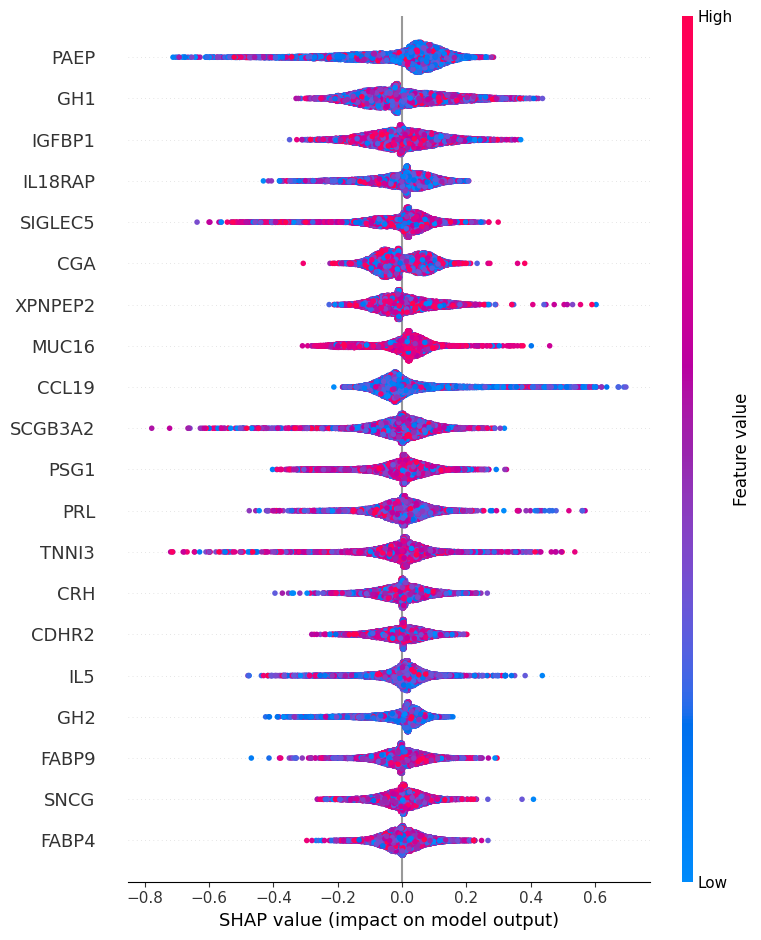

In [558]:
shap.summary_plot(shap_values, Test_input, plot_type='dot', max_display=20)

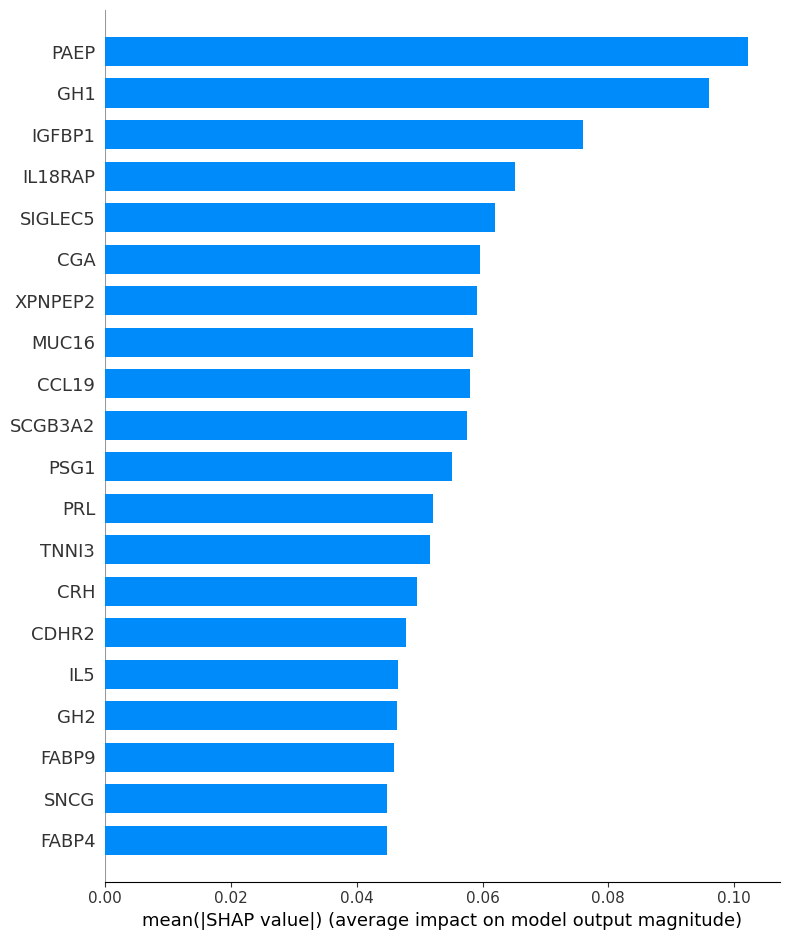

In [559]:
shap.summary_plot(shap_values, Test_input, plot_type='bar', max_display=20)

In [616]:
shap.plots.bar(shap_values[0])

TypeError: The shap_values argument must be an Explanation object, Cohorts object, or dictionary of Explanation objects!

In [581]:
from shap import TreeExplainer, Explanation

In [582]:
exp = Explanation(explainer.values[:,:,1], 
                  explainer.base_values[:,1], 
                  data=Test_input.values, 
                  feature_names=Test_input.columns)

AttributeError: 'DeepExplainer' object has no attribute 'values'

In [598]:
Test_input.columns[1853]

'SUMF2'

In [604]:
explainer

array([-0.77760774], dtype=float32)

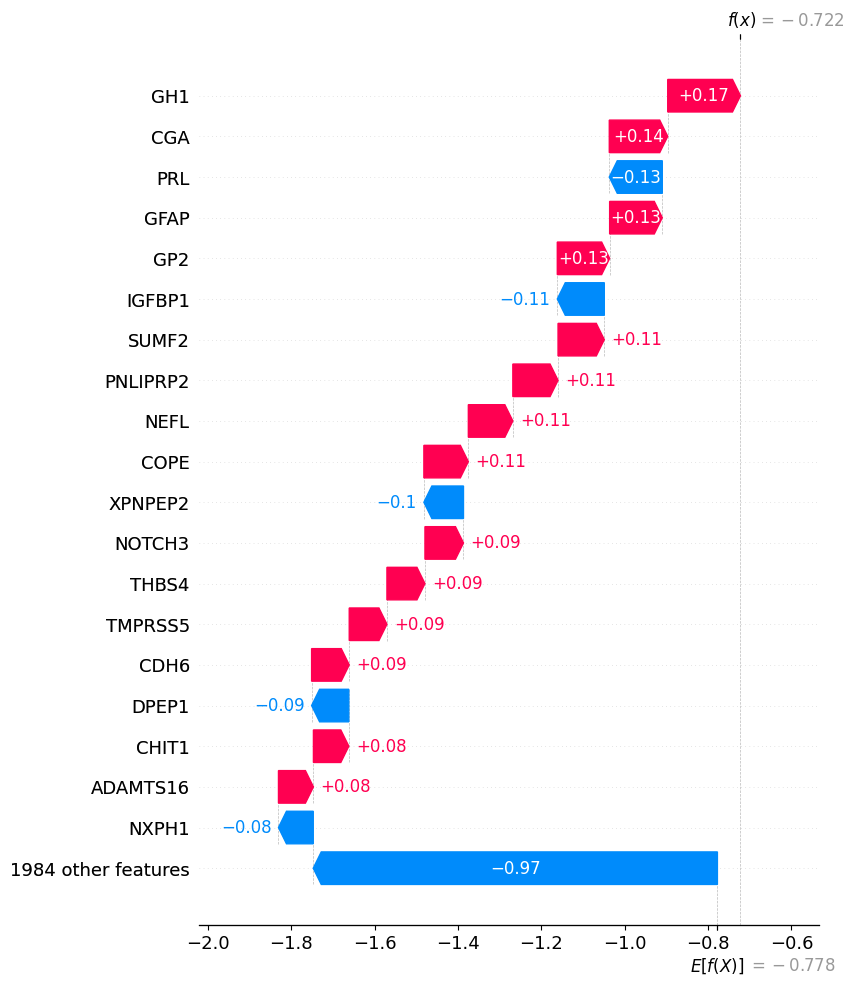

In [735]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0],max_display=20, feature_names=Test_input.columns.tolist())


In [338]:
shap.plots.bar(shap_values, Test_input)

TypeError: The shap_values argument must be an Explanation object, Cohorts object, or dictionary of Explanation objects!

In [339]:
shap.plots.beeswarm(shap_values)

TypeError: The beeswarm plot requires an `Explanation` object as the `shap_values` argument.

In [340]:
shap_values = b

In [341]:
shap_values.shape

(17335, 2003)

In [342]:
feature_names = Test_input.columns


rf_resultX = pd.DataFrame(shap_values, columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance.head()

,col_name,feature_importance_vals
1557,PAEP,0.073079
1137,GH1,0.062343
1226,IGFBP1,0.054488
1777,SIGLEC5,0.047154
1652,PSG1,0.045046


In [343]:
shap_top = shap_importance.iloc[0:200,:]

In [344]:
shap_top

,col_name,feature_importance_vals
1557,PAEP,0.073079
1137,GH1,0.062343
1226,IGFBP1,0.054488
1777,SIGLEC5,0.047154
1652,PSG1,0.045046
...,...,...
638,ATF2,0.017665
1302,ITGA6,0.017604
1168,GSTP1,0.017565
1424,MAX,0.017551


In [351]:
#shap_importance.loc[shap_importance['col_name'] == "PAEP"]

,col_name,feature_importance_vals
1557,PAEP,0.073079


In [92]:
#shap_top.to_csv("shap_top.csv")

In [ ]:
#Validation

In [620]:
x_val

,Inferred_Gender,Age,X1.8495945_T_C_C,X1.20149058_A_G_G,X1.20149560_G_A_A,X1.20150839_A_G_G,X1.20150984_C_G_G,X1.20150998_A_G_G,X1.20151290_C_A_A,X1.20151431_A_G_G,...,WNT9A,WWP2,XCL1,XG,XPNPEP2,XRCC4,YES1,YTHDF3,ZBTB16,ZBTB17
0,1.0,0.549998,1,0,0,0,0,0,0,0,...,1.0818,0.32225,0.7264,0.31340,-1.3662,0.42730,1.2612,0.08990,1.6951,0.6594
1,1.0,0.512735,0,1,1,1,1,1,1,1,...,1.9293,-0.20780,1.5674,0.62860,1.0738,-0.05090,1.5229,-0.83950,0.9943,0.7099
2,1.0,0.861435,1,0,0,0,0,0,0,0,...,1.9482,0.05220,0.7101,2.95780,0.3800,0.15160,0.3169,6.58500,-0.0542,0.4402
3,0.0,0.569724,1,0,0,0,0,0,0,0,...,0.7418,-0.00100,0.6094,1.23175,1.0012,0.42995,2.2570,0.66555,1.5004,0.5938
4,0.0,0.316501,1,0,0,0,0,0,0,0,...,1.2160,0.86990,0.6914,1.56970,1.3984,0.30880,3.0859,0.60870,1.9811,0.7003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.0,0.886000,0,0,0,0,0,0,0,0,...,1.9024,1.26350,0.4685,1.11330,-0.2230,0.33150,4.1097,0.62710,1.5790,0.5641
99,1.0,0.527971,0,0,0,0,0,0,0,0,...,0.9092,0.54870,0.3412,0.33280,1.1751,0.60260,2.5227,-0.07900,2.1626,0.8141
100,1.0,0.686775,1,0,0,0,0,0,0,0,...,1.7824,0.79340,0.9276,-0.01790,0.0907,0.54260,2.3997,0.25610,2.7961,0.9852
101,1.0,0.637956,2,0,0,0,0,0,0,0,...,1.3432,0.60030,1.5771,0.26760,1.3760,0.06980,2.4445,0.27170,1.3544,0.5158


In [622]:
val_data = pd.concat([x_val, pd.DataFrame(Y_val)], axis=1)

In [623]:
val_dataset = VariantsDataset(val_data)

torch.Size([103, 2004])


In [624]:
model(val_dataset)

TypeError: linear(): argument 'input' (position 1) must be Tensor, not VariantsDataset

In [132]:
for data, target in val_loader:
    model.eval()
    output = model(data)
    prediction = torch.argmax(output)
    target = target.float()
    y_true.extend(target.tolist()) 
fpr, tpr, thresholds = metrics.roc_curve(y_true, torch.sigmoid(output))
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Ridge Regression')
display.plot()
plt.show()

NameError: name 'y_true' is not defined

In [625]:
print(prediction)


tensor(13408)


In [626]:
def val(model, device, val_loader):
    #model in eval mode skips Dropout etc
    model.eval()
    y_true = []
    y_pred = []
    
    # set the requires_grad flag to false as we are in the test mode
    with torch.no_grad():
        for data, target in val_loader:
            
            #LOAD THE DATA IN A BATCH
            #data,target = i
            #print(target)
            #print(data)
            # moving the tensors to the configured device
            data, target = data.to(device), target.to(device)
            
            
            output = model(data.float())
            
            #PREDICTIONS
            pred = np.round(torch.sigmoid(output))
            target = target.float()
            y_true.extend(target.tolist()) 
            y_pred.extend(pred.reshape(-1).tolist())
            
    #print(torch.sigmoid(output))        
    print("AUC on test set is" , roc_auc_score(y_true,torch.sigmoid(output)))
    #print("********************************************************")
    print(sum(y_true))
    print(sum(y_pred))
    cm=confusion_matrix(y_true,y_pred)
    tn, fp, fn, tp = cm.ravel()
    print("Sensitivity on test set is" , tp/(tp+fn))
    print("Specificity on test set is" , tn/(tn+fp)) 
    if epoch % 20 == 0:
        #roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
        fpr, tpr, thresholds = metrics.roc_curve(y_true, torch.sigmoid(output))
        roc_auc = metrics.auc(fpr, tpr)
        display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Ridge Regression')
        display.plot()
        plt.show()

In [ ]:
val(model,device,val_loader)

In [138]:
!jupyter nbconvert --to html OLINK_NN.ipynb

[NbConvertApp] Converting notebook OLINK_NN.ipynb to html
[NbConvertApp] Writing 12098711 bytes to OLINK_NN.html


In [ ]:
test(model,device,val_loader)

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 332 kB 5.5 MB/s eta 0:00:01
  distutils: /home/ffc4001/.local/lib/python3.9/site-packages
  sysconfig: /home/ffc4001/.local/lib64/python3.9/site-packages
  user = True
  home = None
  root = None
  prefix = None


In [785]:
# This Libraray is modified based the work by Milo Spencer-Harper and Oli Blum, https://stackoverflow.com/a/37366154/10404826
# On top of that, I added support for showing weights (linewidth, colors, etc.)
# Contributor: Jianzheng Liu
# Contact: jzliu.100@gmail.com

from matplotlib import pyplot
from math import cos, sin, atan
from palettable.tableau import Tableau_10
from time import localtime, strftime
import numpy as np

class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius, id=-1):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)
        pyplot.gca().text(self.x, self.y-0.15, str(id), size=10, ha='center')

class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2, weight=0.4, textoverlaphandler=None):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)

        # assign colors to lines depending on the sign of the weight
        color=Tableau_10.mpl_colors[0]
        if weight > 0: color=Tableau_10.mpl_colors[1]

        # assign different linewidths to lines depending on the size of the weight
        abs_weight = abs(weight)        
        if abs_weight > 0.5: 
            linewidth = 10*abs_weight
        elif abs_weight > 0.8: 
            linewidth =  100*abs_weight
        else:
            linewidth = abs_weight

        # draw the weights and adjust the labels of weights to avoid overlapping
        if abs_weight > 0.5: 
            # while loop to determine the optimal locaton for text lables to avoid overlapping
            index_step = 2
            num_segments = 10   
            txt_x_pos = neuron1.x - x_adjustment+index_step*(neuron2.x-neuron1.x+2*x_adjustment)/num_segments
            txt_y_pos = neuron1.y - y_adjustment+index_step*(neuron2.y-neuron1.y+2*y_adjustment)/num_segments
            while ((not textoverlaphandler.getspace([txt_x_pos-0.5, txt_y_pos-0.5, txt_x_pos+0.5, txt_y_pos+0.5])) and index_step < num_segments):
                index_step = index_step + 1
                txt_x_pos = neuron1.x - x_adjustment+index_step*(neuron2.x-neuron1.x+2*x_adjustment)/num_segments
                txt_y_pos = neuron1.y - y_adjustment+index_step*(neuron2.y-neuron1.y+2*y_adjustment)/num_segments

            # print("Label positions: ", "{:.2f}".format(txt_x_pos), "{:.2f}".format(txt_y_pos), "{:3.2f}".format(weight))
            a=pyplot.gca().text(txt_x_pos, txt_y_pos, "{:3.2f}".format(weight), size=8, ha='center')
            a.set_bbox(dict(facecolor='white', alpha=0))
            # print(a.get_bbox_patch().get_height())

        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment), linewidth=linewidth, color=color)
        pyplot.gca().add_line(line)

    def draw(self, layerType=0, weights=None, textoverlaphandler=None):
        j=0 # index for neurons in this layer
        for neuron in self.neurons:            
            i=0 # index for neurons in previous layer
            neuron.draw( self.neuron_radius, id=j+1 )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron, weights[i,j], textoverlaphandler)
                    i=i+1
            j=j+1
        
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

# A class to handle Text Overlapping
# The idea is to first create a grid space, if a grid is already occupied, then
# the grid is not available for text labels.
class TextOverlappingHandler():
    # initialize the class with the width and height of the plot area
    def __init__(self, width, height, grid_size=0.2):
        self.grid_size = grid_size
        self.cells = np.ones((int(np.ceil(width / grid_size)), int(np.ceil(height / grid_size))), dtype=bool)

    # input test_coordinates(bottom left and top right), 
    # getspace will tell you whether a text label can be put in the test coordinates
    def getspace(self, test_coordinates):
        x_left_pos = int(np.floor(test_coordinates[0]/self.grid_size))
        y_botttom_pos = int(np.floor(test_coordinates[1]/self.grid_size))
        x_right_pos = int(np.floor(test_coordinates[2]/self.grid_size))
        y_top_pos = int(np.floor(test_coordinates[3]/self.grid_size))
        if self.cells[x_left_pos, y_botttom_pos] and self.cells[x_left_pos, y_top_pos] \
        and self.cells[x_right_pos, y_top_pos] and self.cells[x_right_pos, y_botttom_pos]:
            for i in range(x_left_pos, x_right_pos):
                for j in range(y_botttom_pos, y_top_pos):
                    self.cells[i, j] = False

            return True
        else:
            return False

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self, weights_list=None):
        # vertical_distance_between_layers and horizontal_distance_between_neurons are the same with the variables of the same name in layer class
        vertical_distance_between_layers = 6
        horizontal_distance_between_neurons = 2
        overlaphandler = TextOverlappingHandler(\
            self.number_of_neurons_in_widest_layer*horizontal_distance_between_neurons,\
            len(self.layers)*vertical_distance_between_layers, grid_size=0.2 )

        pyplot.figure(figsize=(12, 9))
        for i in range( len(self.layers) ):
            layer = self.layers[i]                                
            if i == 0:
                layer.draw( layerType=0 )
            elif i == len(self.layers)-1:
                layer.draw( layerType=-1, weights=weights_list[i-1], textoverlaphandler=overlaphandler)
            else:
                layer.draw( layerType=i, weights=weights_list[i-1], textoverlaphandler=overlaphandler)

        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        figureName='ANN_'+strftime("%Y%m%d_%H%M%S", localtime())+'.png'
        pyplot.savefig(figureName, dpi=300, bbox_inches="tight")
        pyplot.show()

class DrawNN():
    # para: neural_network is an array of the number of neurons 
    # from input layer to output layer, e.g., a neural network of 5 nerons in the input layer, 
    # 10 neurons in the hidden layer 1 and 1 neuron in the output layer is [5, 10, 1]
    # para: weights_list (optional) is the output weights list of a neural network which can be obtained via classifier.coefs_
    def __init__( self, neural_network, weights_list=None ):
        self.neural_network = neural_network
        self.weights_list = weights_list
        # if weights_list is none, then create a uniform list to fill the weights_list
        if weights_list is None:
            weights_list=[]
            for first, second in zip(neural_network, neural_network[1:]):
                tempArr = np.ones((first, second))*0.4
                weights_list.append(tempArr)
            self.weights_list = weights_list
        
    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw(self.weights_list)

In [786]:
DrawNN

__main__.DrawNN